# Turing Model

## Setup

### Packages

In [1]:
import numpy as np
from scipy import integrate as integ
from scipy import signal as signal
import sympy as sp
import matplotlib
from matplotlib.lines import Line2D
from matplotlib import pyplot as plt
import seaborn as sns
import ipywidgets
from tqdm import tqdm
###
from turing_model import TuringModel as tm

### Sim Setup

In [2]:
t_end = 20000 #4000  # 100000
number_steps = 10000 #2000  # 25000
t = np.linspace(0, t_end, number_steps)
# dispersal adaptability
k_1 = 5
k_2 = 0
k_1_range = np.geomspace(0.0001, 10, 100)
k_2_range = np.geomspace(0.0001, 10, 100)
# maximum dispersal rate
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
d_Hmax1_range = np.logspace(-3, -1, 250)
d_Hmax2_range = d_Hmax1_range

# var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

In [3]:
# Save results
# results = np.zeros((len(d_Hmax1_range),len(d_Hmax2_range)))
density_H1x = np.zeros((len(d_Hmax2_range)))
density_H1y = np.zeros((len(d_Hmax2_range)))
density_H2x = np.zeros((len(d_Hmax2_range)))
density_H2y = np.zeros((len(d_Hmax2_range)))
mode_H1 = np.zeros((len(d_Hmax2_range)))
mode_H2 = np.zeros((len(d_Hmax2_range)))
checkOsc_H1x = np.zeros((len(d_Hmax2_range)))
checkOsc_H1y = np.zeros((len(d_Hmax2_range)))
checkOsc_H2x = np.zeros((len(d_Hmax2_range)))
checkOsc_H2y = np.zeros((len(d_Hmax2_range)))
meandensity_H1x = np.zeros((len(d_Hmax2_range)))
meandensity_H1y = np.zeros((len(d_Hmax2_range)))
meandensity_H2x = np.zeros((len(d_Hmax2_range)))
meandensity_H2y = np.zeros((len(d_Hmax2_range)))
autodensity_Ax = np.zeros((len(d_Hmax2_range)))
autodensity_Ay = np.zeros((len(d_Hmax2_range)))
autodensityOsc_Ax = np.zeros((len(d_Hmax2_range)))
autodensityOsc_Ay = np.zeros((len(d_Hmax2_range)))
H1xmax = np.zeros((len(d_Hmax2_range)))
H2xmax = np.zeros((len(d_Hmax2_range)))
H1xmin = np.zeros((len(d_Hmax2_range)))
H2xmin = np.zeros((len(d_Hmax2_range)))
total_H1 = np.zeros((len(d_Hmax2_range)))
total_H2 = np.zeros((len(d_Hmax2_range)))
invasion = np.zeros((len(d_Hmax2_range)))
# save initial values in an array
initials = np.array(var0)

In [4]:
# save lib is not final yet since depending on the task, further additions may be needed.
# The model is already saving a bunch of other data and I'm not sure if they are needed.
save_lib = {
    "density_H1x": density_H1x,
    "density_H1y": density_H1y,
    "density_H2x": density_H2x,
    "density_H2y": density_H2y,
    "checkOsc_H1x": checkOsc_H1x,
    "checkOsc_H1y": checkOsc_H1y,
    "checkOsc_H2x": checkOsc_H2x,
    "checkOsc_H2y": checkOsc_H2y,
    "meandensity_H1x": meandensity_H1x,
    "meandensity_H1y": meandensity_H1y,
    "meandensity_H2x": meandensity_H2x,
    "meandensity_H2y": meandensity_H2y,
    "autodensity_Ax": autodensity_Ax,
    "autodensity_Ay": autodensity_Ay,
    "autodensityOsc_Ax": autodensityOsc_Ax,
    "autodensityOsc_Ay": autodensityOsc_Ay,
    "H1xmax": H1xmax,
    "H2xmax": H2xmax,
    "H1xmin": H1xmin,
    "H2xmin": H2xmin,
    "initials": initials
}
# tm.savedata("foldername", save_lib)
load_list = ["density_H1x", "density_H1y", "density_H2x", "density_H2y", "checkOsc_H1x", "checkOsc_H1y", "checkOsc_H2x", "checkOsc_H2y", "meandensity_H1x",
             "meandensity_H1y", "meandensity_H2x", "meandensity_H2y", "autodensity_Ax", "autodensity_Ay", "autodensityOsc_Ax", "autodensityOsc_Ay", "initials"]
# tm.loaddata("foldername", load_list)

In [ ]:
# Integrating over one variable parameter
i = 0
j = 0

for d_Hmax1 in tqdm(d_Hmax1_range):
    d_Hmax2 = d_Hmax1
    model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

    # results[i,j] = ...
    density_H1x[i] = var[-1, 4]
    density_H1y[i] = var[-1, 5]
    density_H2x[i] = var[-1, 6]
    density_H2y[i] = var[-1, 7]

    checkOsc_H1x[i] = np.var(var[-200:-1, 4])
    checkOsc_H1y[i] = np.var(var[-200:-1, 5])
    checkOsc_H2x[i] = np.var(var[-200:-1, 6])
    checkOsc_H2y[i] = np.var(var[-200:-1, 7])

    meandensity_H1x[i] = np.mean(var[-200:-1, 4])
    meandensity_H1y[i] = np.mean(var[-200:-1, 5])
    meandensity_H2x[i] = np.mean(var[-200:-1, 6])
    meandensity_H2y[i] = np.mean(var[-200:-1, 7])

    autodensity_Ax[i] = np.mean(var[-200:-1, 2])
    autodensity_Ay[i] = np.mean(var[-200:-1, 3])

    autodensityOsc_Ax[i] = np.var(var[-200:-1, 2])
    autodensityOsc_Ay[i] = np.var(var[-200:-1, 3])

    H1xmax[i] = max(var[-200:-1, 4])
    H1xmin[i] = min(var[-200:-1, 4])
    H2xmax[i] = max(var[-200:-1, 6])
    H2xmin[i] = min(var[-200:-1, 6])

    i += 1

In [ ]:
# Integrating over two variable parameters
# change for new method with equation wrapper

var = []

i = 0
j = 0

for d_Hmax2 in tqdm(d_Hmax2_range):
    j = 0
    for d_Hmax1 in d_Hmax1_range:
        model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

        # results[i,j] = ...
        density_H1x[i, j] = var[-1, 4]
        density_H1y[i, j] = var[-1, 5]
        density_H2x[i, j] = var[-1, 6]
        density_H2y[i, j] = var[-1, 7]

        checkOsc_H1x[i, j] = np.var(var[-200:-1, 4])
        checkOsc_H1y[i, j] = np.var(var[-200:-1, 5])
        checkOsc_H2x[i, j] = np.var(var[-200:-1, 6])
        checkOsc_H2y[i, j] = np.var(var[-200:-1, 7])

        meandensity_H1x[i, j] = np.mean(var[-200:-1, 4])
        meandensity_H1y[i, j] = np.mean(var[-200:-1, 5])
        meandensity_H2x[i, j] = np.mean(var[-200:-1, 6])
        meandensity_H2y[i, j] = np.mean(var[-200:-1, 7])

        autodensity_Ax[i, j] = np.mean(var[-200:-1, 2])
        autodensity_Ay[i, j] = np.mean(var[-200:-1, 3])

        autodensityOsc_Ax[i, j] = np.var(var[-200:-1, 2])
        autodensityOsc_Ay[i, j] = np.var(var[-200:-1, 3])

        H1xmax[i, j] = max(var[-200:-1, 4])
        H2xmax[i, j] = max(var[-200:-1, 6])

        j += 1
    i += 1

## Results
### Heatmaps
#### Iterating over max dispersal speed dHmax

C:\Users\rmjar\AppData\Local\Temp\ipykernel_16864\1262331428.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


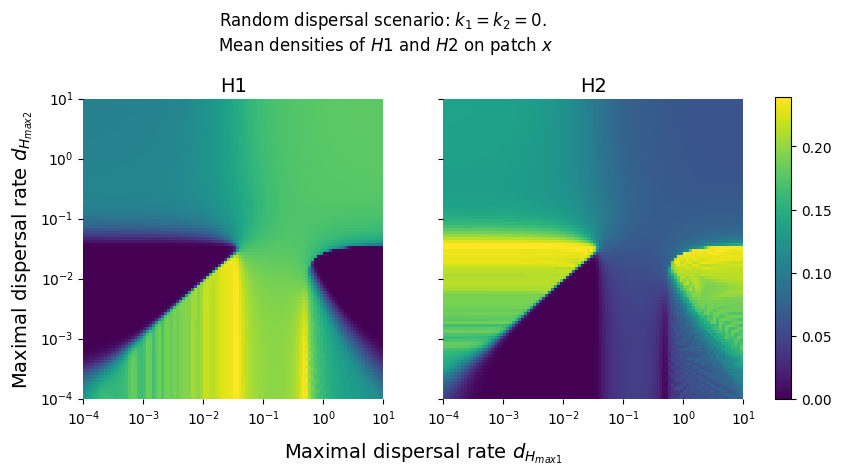

In [ ]:
# Random dispersal scenario
# Heatmap: Iterating over dHmax1 and dHmax2 for k1 = k2 = 0.
ld = tm.loaddata("k1equalsk2", ["meandensity_H1x", "meandensity_H2x"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), gridspec_kw={'top': 1.25})

sns.heatmap(ld["meandensity_H1x"], cmap="viridis",
            square=True, cbar=False, ax=ax1, vmin=0, vmax=np.max(ld["meandensity_H1x"]))
ax1.set_ylabel("Maximal dispersal rate $d_{H_{max2}}$", fontsize=14)
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax1.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
ax1.set_title("H1", fontsize=14)

sns.heatmap(ld["meandensity_H2x"], cmap="viridis",
            square=True, cbar=False, ax=ax2, vmin=0, vmax=np.max(ld["meandensity_H1x"]))
ax2.invert_yaxis()
ax2.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax2.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_title("H2", fontsize=14)

fig.text(
    0.55, 0.42, 'Maximal dispersal rate $d_{H_{max1}}$', ha='center', fontsize=14)
fig.subplots_adjust(right=0.95)
cb_ax = fig.add_axes([0.99, 0.493, 0.02, 0.377])
cbar = fig.colorbar(ax1.get_children()[0], cax=cb_ax)
fig.suptitle(
    "Random dispersal scenario: $k_1 = k_2 = 0$. \n Mean densities of $H1$ and $H2$ on patch $x$")
fig.tight_layout()

C:\Users\rmjar\AppData\Local\Temp\ipykernel_12164\3934124723.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


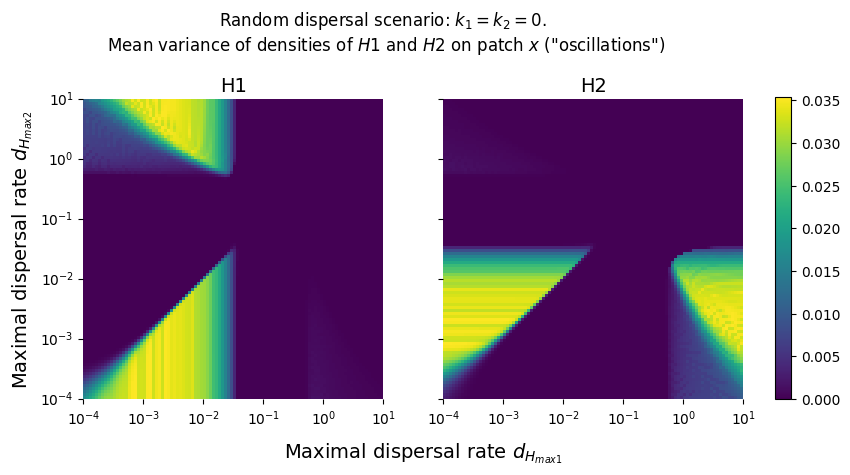

In [ ]:
# Random dispersal scenario
# Heatmap: Checking for oscillations
# Oscillations are checked by comparing variance in the heterotroph densities over the last 200 time steps.
ld = tm.loaddata("k1equalsk2", ["checkOsc_H1x", "checkOsc_H2x"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), gridspec_kw={'top': 1.25})

sns.heatmap(ld["checkOsc_H1x"], cmap="viridis", square=True,
            cbar=False, ax=ax1, vmin=0, vmax=np.max(ld["checkOsc_H1x"]))
ax1.set_ylabel("Maximal dispersal rate $d_{H_{max2}}$", fontsize=14)
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax1.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
ax1.set_title("H1", fontsize=14)

sns.heatmap(ld["checkOsc_H2x"], cmap="viridis", square=True,
            cbar=False, ax=ax2, vmin=0, vmax=np.max(ld["checkOsc_H1x"]))
ax2.invert_yaxis()
ax2.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax2.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_title("H2", fontsize=14)

fig.text(
    0.55, 0.42, 'Maximal dispersal rate $d_{H_{max1}}$', ha='center', fontsize=14)
fig.subplots_adjust(right=0.95)
cb_ax = fig.add_axes([0.99, 0.493, 0.02, 0.377])
cbar = fig.colorbar(ax1.get_children()[0], cax=cb_ax)
fig.suptitle("Random dispersal scenario: $k_1 = k_2 = 0$. \n Mean variance of densities of $H1$ and $H2$ on patch $x$ (\"oscillations\")")
fig.tight_layout()

C:\Users\rmjar\AppData\Local\Temp\ipykernel_16864\1351474246.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


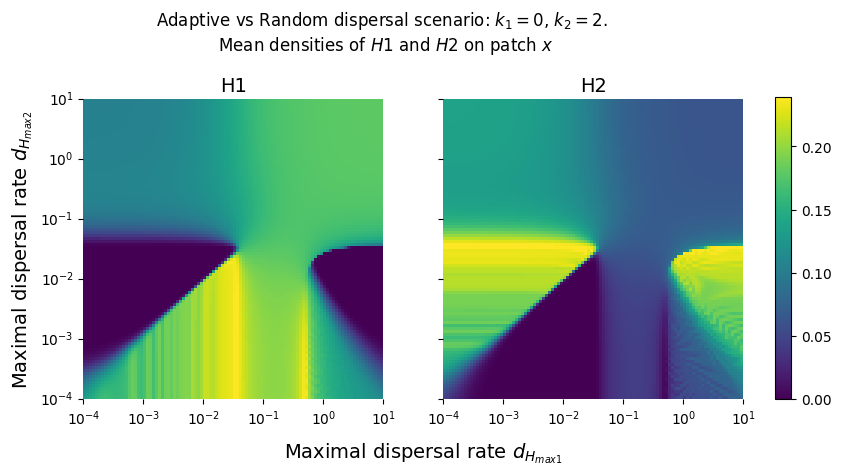

In [ ]:
# Adaptive vs Random dispersal scenario
# Heatmap: Iterating over dHmax1 and dHmax2 for k1 = k2 = 0.
ld = tm.loaddata("different_k", ["meandensity_H1x", "meandensity_H2x"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), gridspec_kw={'top': 1.25})

sns.heatmap(ld["meandensity_H1x"], cmap="viridis",
            square=True, cbar=False, ax=ax1, vmin=0, vmax=np.max(ld["meandensity_H1x"]))
ax1.set_ylabel("Maximal dispersal rate $d_{H_{max2}}$", fontsize=14)
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax1.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
ax1.set_title("H1", fontsize=14)

sns.heatmap(ld["meandensity_H2x"], cmap="viridis",
            square=True, cbar=False, ax=ax2, vmin=0, vmax=np.max(ld["meandensity_H1x"]))
ax2.invert_yaxis()
ax2.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax2.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_title("H2", fontsize=14)

fig.text(
    0.55, 0.42, 'Maximal dispersal rate $d_{H_{max1}}$', ha='center', fontsize=14)
fig.subplots_adjust(right=0.95)
cb_ax = fig.add_axes([0.99, 0.493, 0.02, 0.377])
cbar = fig.colorbar(ax1.get_children()[0], cax=cb_ax)
fig.suptitle(
    "Adaptive vs Random dispersal scenario: $k_1 = 0$, $k_2 = 2$. \n Mean densities of $H1$ and $H2$ on patch $x$")
fig.tight_layout()

C:\Users\rmjar\AppData\Local\Temp\ipykernel_12164\3787424772.py:34: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  fig.tight_layout()


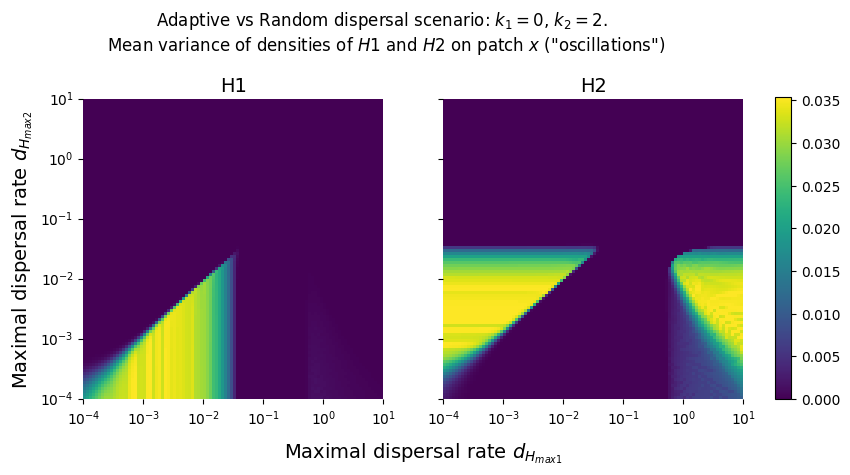

In [ ]:
# Adaptive vs Random dispersal scenario
# Heatmap: Checking for oscillations
# Oscillations are checked by comparing variance in the heterotroph densities over the last 200 time steps.
ld = tm.loaddata("different_k", ["checkOsc_H1x", "checkOsc_H2x"])
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(8, 8), gridspec_kw={'top': 1.25})

sns.heatmap(ld["checkOsc_H1x"], cmap="viridis", square=True,
            cbar=False, ax=ax1, vmin=0, vmax=np.max(ld["checkOsc_H1x"]))
ax1.set_ylabel("Maximal dispersal rate $d_{H_{max2}}$", fontsize=14)
ax1.invert_yaxis()
ax1.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax1.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax1.set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
ax1.set_title("H1", fontsize=14)

sns.heatmap(ld["checkOsc_H2x"], cmap="viridis", square=True,
            cbar=False, ax=ax2, vmin=0, vmax=np.max(ld["checkOsc_H1x"]))
ax2.invert_yaxis()
ax2.set_xticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_xticklabels(["$10^{-4}$", "$10^{-3}$", "$10^{-2}$",
                    "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
ax2.set_yticks(np.linspace(0, len(d_Hmax1_range), 6))
ax2.set_title("H2", fontsize=14)

fig.text(
    0.55, 0.42, 'Maximal dispersal rate $d_{H_{max1}}$', ha='center', fontsize=14)
fig.subplots_adjust(right=0.95)
cb_ax = fig.add_axes([0.99, 0.493, 0.02, 0.377])
cbar = fig.colorbar(ax1.get_children()[0], cax=cb_ax)
fig.suptitle("Adaptive vs Random dispersal scenario: $k_1 = 0$, $k_2 = 2$. \n Mean variance of densities of $H1$ and $H2$ on patch $x$ (\"oscillations\")")
fig.tight_layout()

#### Iterating over sensitivity k

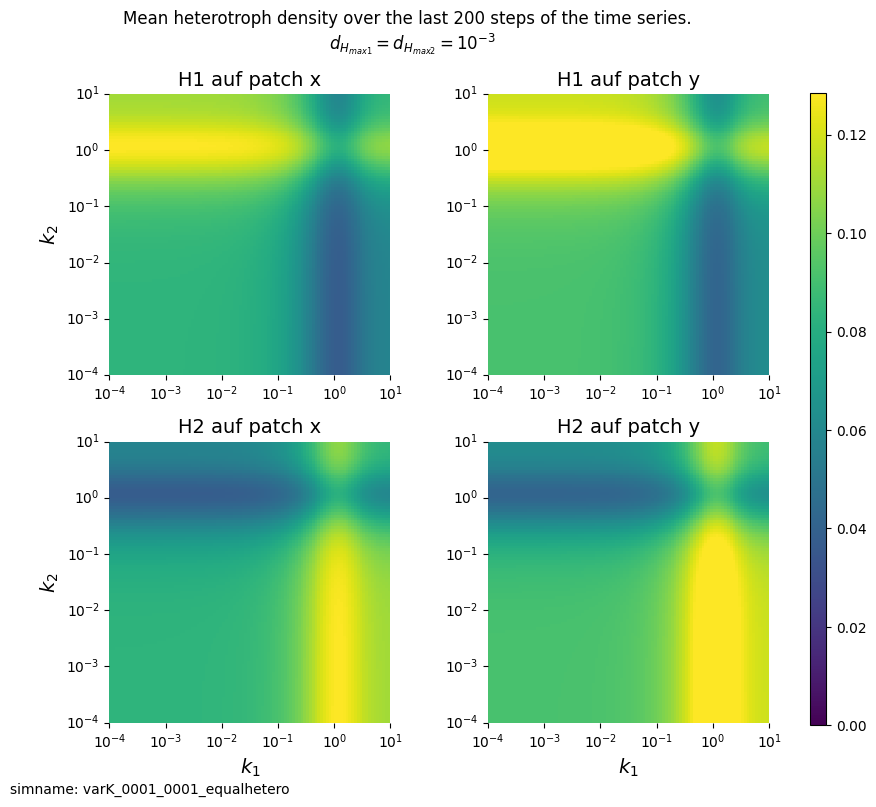

In [ ]:
ld = tm.loaddata("varK_0001_0001_equalhetero", [
                 "meandensity_H1x", "meandensity_H1y", "meandensity_H2x", "meandensity_H2y"])

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.heatmap(ld["meandensity_H1x"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[0, 0].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[0, 0].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[0, 0].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[0, 0].set_ylabel("$k_2$", fontsize=14)
axes[0, 0].set_title("H1 auf patch x", fontsize=14)

sns.heatmap(ld["meandensity_H1y"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[0, 1])
axes[0, 1].invert_yaxis()
axes[0, 1].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[0, 1].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[0, 1].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[0, 1].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[0, 1].set_title("H1 auf patch y", fontsize=14)

sns.heatmap(ld["meandensity_H2x"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[1, 0])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[1, 0].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[1, 0].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[1, 0].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[1, 0].set_ylabel("$k_2$", fontsize=14)
axes[1, 0].set_xlabel("$k_1$", fontsize=14)
axes[1, 0].set_title("H2 auf patch x", fontsize=14)

sns.heatmap(ld["meandensity_H2y"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[1, 1])
axes[1, 1].invert_yaxis()
axes[1, 1].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[1, 1].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[1, 1].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[1, 1].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[1, 1].set_xlabel("$k_1$", fontsize=14)
axes[1, 1].set_title("H2 auf patch y", fontsize=14)

plt.suptitle(
    "Mean heterotroph density over the last 200 steps of the time series. \n $d_{H_{max1}} = d_{H_{max2}} = 10^{-3}$")
plt.tight_layout()
plt.figtext(0, 0, "simname: varK_0001_0001_equalhetero")
cb_ax = fig.add_axes([1, 0.0857, 0.02, 0.79])
cbar = fig.colorbar(axes[0, 0].get_children()[0], cax=cb_ax)

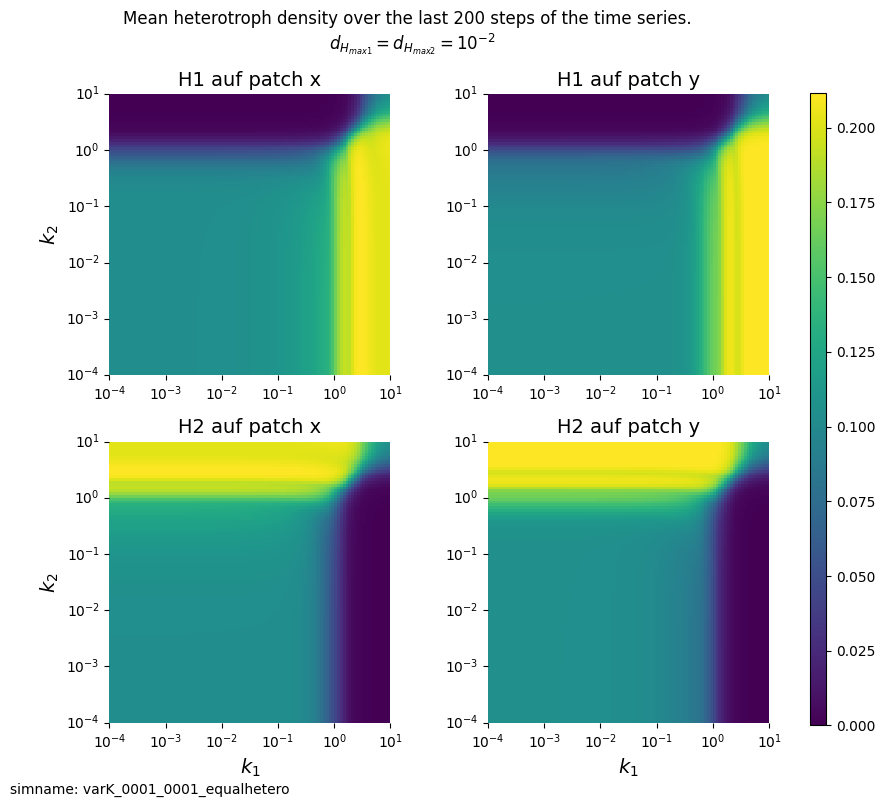

In [ ]:
ld = tm.loaddata("varK_001_001_equalhetero", [
                 "meandensity_H1x", "meandensity_H1y", "meandensity_H2x", "meandensity_H2y"])

fig, axes = plt.subplots(2, 2, figsize=(8, 8))

sns.heatmap(ld["meandensity_H1x"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[0, 0])
axes[0, 0].invert_yaxis()
axes[0, 0].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[0, 0].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[0, 0].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[0, 0].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[0, 0].set_ylabel("$k_2$", fontsize=14)
axes[0, 0].set_title("H1 auf patch x", fontsize=14)

sns.heatmap(ld["meandensity_H1y"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[0, 1])
axes[0, 1].invert_yaxis()
axes[0, 1].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[0, 1].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[0, 1].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[0, 1].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[0, 1].set_title("H1 auf patch y", fontsize=14)

sns.heatmap(ld["meandensity_H2x"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[1, 0])
axes[1, 0].invert_yaxis()
axes[1, 0].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[1, 0].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[1, 0].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[1, 0].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[1, 0].set_ylabel("$k_2$", fontsize=14)
axes[1, 0].set_xlabel("$k_1$", fontsize=14)
axes[1, 0].set_title("H2 auf patch x", fontsize=14)

sns.heatmap(ld["meandensity_H2y"], cmap="viridis", square=True, vmin=0,
            vmax=np.max(ld["meandensity_H1x"]), cbar=False, ax=axes[1, 1])
axes[1, 1].invert_yaxis()
axes[1, 1].set_xticks(np.linspace(0, len(k_1_range), 6))
axes[1, 1].set_xticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"], rotation=0)
axes[1, 1].set_yticks(np.linspace(0, len(k_1_range), 6))
axes[1, 1].set_yticklabels(
    ["$10^{-4}$", "$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
axes[1, 1].set_xlabel("$k_1$", fontsize=14)
axes[1, 1].set_title("H2 auf patch y", fontsize=14)

plt.suptitle(
    "Mean heterotroph density over the last 200 steps of the time series. \n $d_{H_{max1}} = d_{H_{max2}} = 10^{-2}$")
plt.tight_layout()
plt.figtext(0, 0, "simname: varK_0001_0001_equalhetero")
cb_ax = fig.add_axes([1, 0.0857, 0.02, 0.79])
cbar = fig.colorbar(axes[0, 0].get_children()[0], cax=cb_ax)

In [ ]:
# ld = tm.loaddata("varK_001_001_equalhetero", ["meandensity_H1x", "meandensity_H1y", "meandensity_H2x", "meandensity_H2y"])
# doesnt exist yet

### Transition of superior strategy
When comparing an adaptively dispersing competitor to a randomly dispersing one, there is a transtition of the superior strategy between $10^{-3}$ and $10^{-2}$.
At lower dispersal maxima, the randomly dispersing competitor is superior, while at higher dispersal maxima, the adaptively dispersing competitor is superior.

Text(0, 0, 'simname: bifurcation-transition')

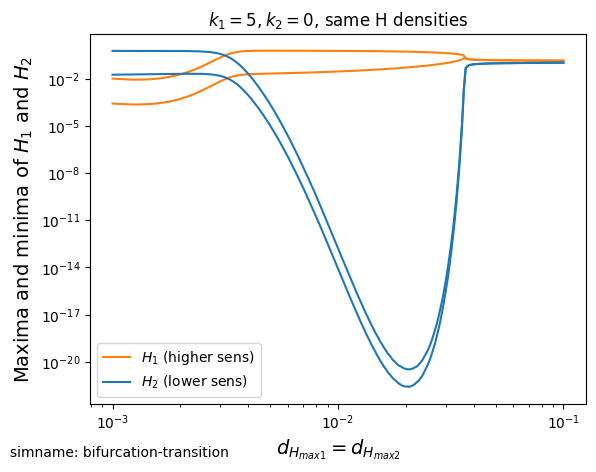

In [ ]:
# t_end = 20000, number_steps = 10000
# k_1 = 5, k_2 = 0, d_Hmax1 = d_Hmax2 = 10**-3 -> 10**-1
# 250 values of dHmax1, dHmax2
# heterotroph densities are equal
d_Hmax1_range = np.logspace(-3, -1, 250)
ld = tm.loaddata("bifurcation-transition", [
                 "H1xmax", "H1xmin", "H2xmax", "H2xmin"])

plt.plot(d_Hmax1_range,ld["H1xmax"],'-', color="#FF7F0E", label="$H_{1}$ (higher sens)")
plt.plot(d_Hmax1_range,ld["H1xmin"],'-', color="#FF7F0E")
plt.plot(d_Hmax1_range,ld["H2xmax"],'-', color="#1F77B4", label="$H_{2}$ (lower sens)")
plt.plot(d_Hmax1_range,ld["H2xmin"],'-', color="#1F77B4")
#plt.plot([0.01, 0.01], [0, 0.6], '--', color="grey", label="$d_{H_{max1}} = d_{H_{max2}}$")
#plt.plot([10**-3, 10**-1], [(10**-6), (10**-6)],'-', color="grey")
plt.xlabel("$d_{H_{max1}} = d_{H_{max2}}$", fontsize=14)
plt.ylabel("Maxima and minima of $H_1$ and $H_2$", fontsize=14)
plt.legend()
plt.title("$k_1 = 5, k_2 = 0$, same H densities")
plt.xscale("log")
plt.yscale("log")
plt.figtext(0, 0, "simname: bifurcation-transition")
# while there are differences in densities at the end of the range of dHmax, 
# the trajectory of both heterotrophs seems to approach the same equilibrium

Text(0.5, 0.98, '$k1 = $0, $k2 = $5, $dHmax1 = dHmax2 = $0.001. All graphs show the same time series.\n Shown are heterotroph densities of both competitors on one patch.')

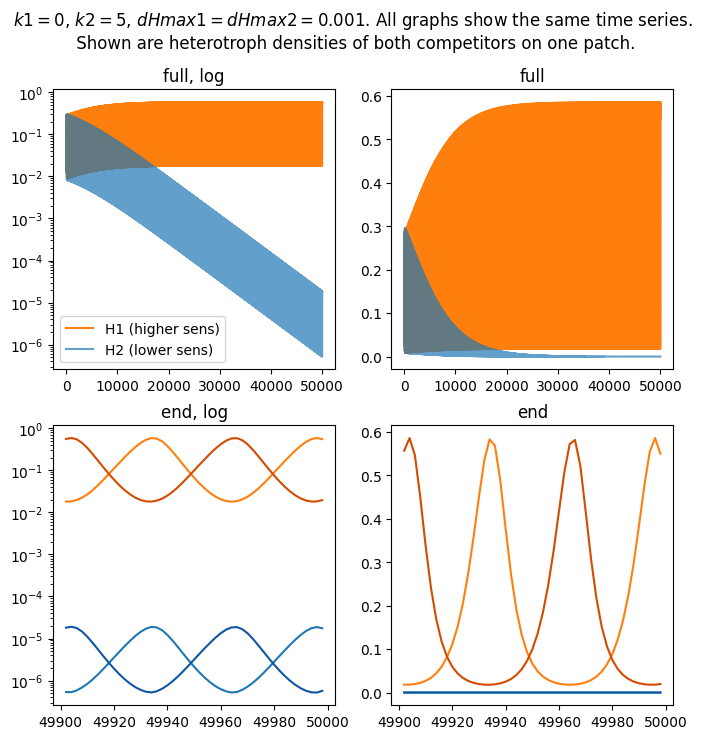

In [59]:
t_end = 50000
number_steps = 25000
t = np.linspace(0, t_end, number_steps)
k_1 = 0
k_2 = 5
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(8,8))
ax1.set_title("full, log")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1 (higher sens)", color="#FF7F0E")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2 (lower sens)", color="#1F77B4", alpha=0.7)
ax1.set_yscale("log")
ax1.legend()
ax2.set_title("full")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 4]), color="#FF7F0E")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 6]), color="#1F77B4", alpha=0.7)
ax3.set_title("end, log")
ax3.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax3.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax3.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax3.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
ax3.set_yscale("log")
ax4.set_title("end")
ax4.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax4.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax4.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax4.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
plt.suptitle("$k1 = $" + str(k_1) + ", $k2 = $" + str(k_2) + 
             ", $dHmax1 = dHmax2 = $" + repr(d_Hmax1) + 
             ". All graphs show the same time series." +
             "\n Shown are heterotroph densities of both competitors on one patch.")

Text(0.5, 0.98, '$k1 = $5, $k2 = $0, $dHmax1 = dHmax2 = $0.01. All graphs show the same time series.\n Shown are heterotroph densities of both competitors on one patch.')

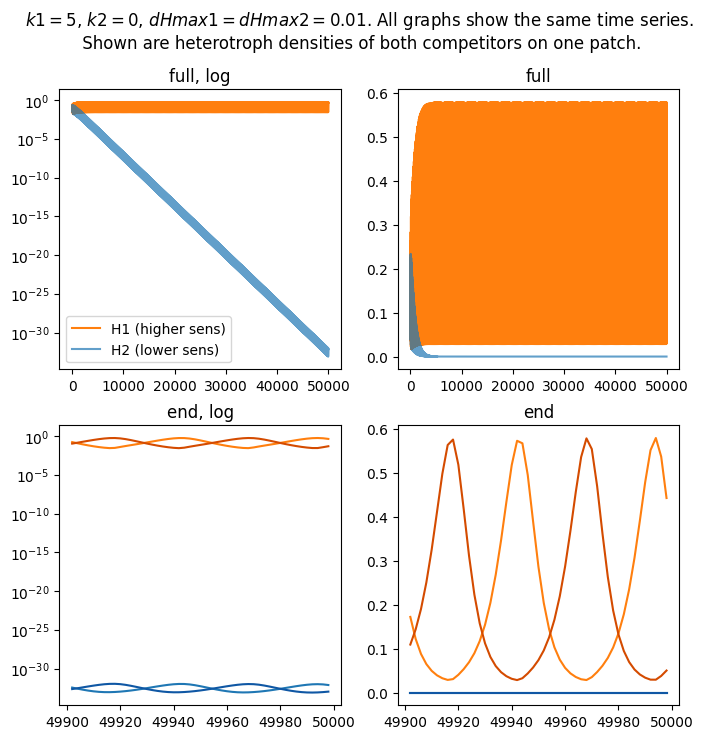

In [ ]:
t_end = 50000
number_steps = 25000
t = np.linspace(0, t_end, number_steps)
k_1 = 5
k_2 = 0
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(8,8))
ax1.set_title("full, log")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1 (higher sens)", color="#FF7F0E")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2 (lower sens)", color="#1F77B4", alpha=0.7)
ax1.set_yscale("log")
ax1.legend()
ax2.set_title("full")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 4]), color="#FF7F0E")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 6]), color="#1F77B4", alpha=0.7)
ax3.set_title("end, log")
ax3.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax3.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax3.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax3.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
ax3.set_yscale("log")
ax4.set_title("end")
ax4.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax4.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax4.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax4.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
plt.suptitle("$k1 = $" + str(k_1) + ", $k2 = $" + str(k_2) + 
             ", $dHmax1 = dHmax2 = $" + repr(d_Hmax1) + 
             ". All graphs show the same time series."  
             "\n Shown are heterotroph densities of both competitors on one patch.")

Text(0.5, 0.98, '$k1 = $5, $k2 = $0, $dHmax1 = dHmax2 = $0.1. All graphs show the same time series.\n Shown are heterotroph densities of both competitors on one patch.')

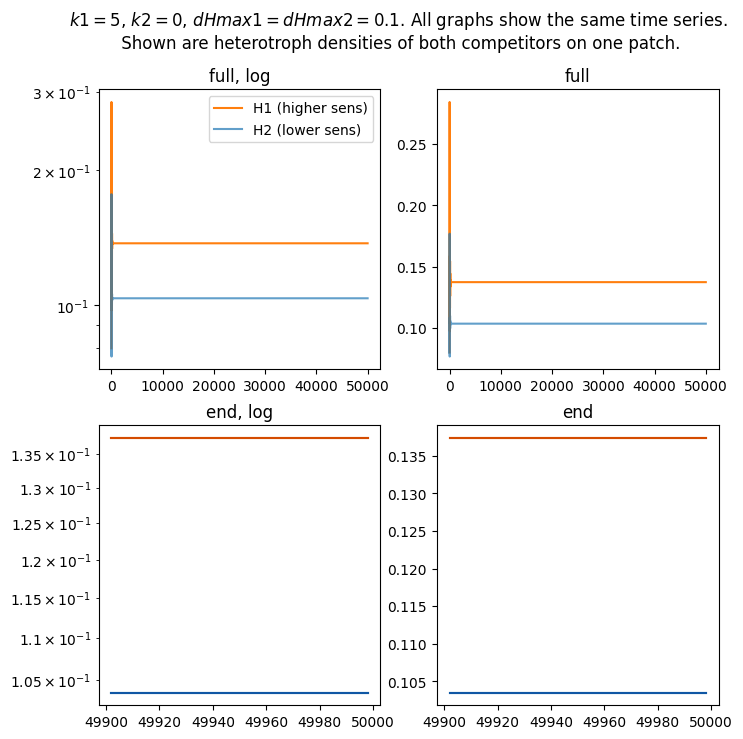

In [ ]:
t_end = 50000
number_steps = 25000
t = np.linspace(0, t_end, number_steps)
k_1 = 5
k_2 = 0
d_Hmax1 = 10**-1
d_Hmax2 = 10**-1
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

fig,((ax1, ax2), (ax3, ax4)) = plt.subplots(2,2,figsize=(8,8))
ax1.set_title("full, log")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1 (higher sens)", color="#FF7F0E")
ax1.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2 (lower sens)", color="#1F77B4", alpha=0.7)
ax1.set_yscale("log")
ax1.legend()
ax2.set_title("full")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 4]), color="#FF7F0E")
ax2.plot(t[-25000:-1], (var[-25000:-1:, 6]), color="#1F77B4", alpha=0.7)
ax3.set_title("end, log")
ax3.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax3.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax3.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax3.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
ax3.set_yscale("log")
ax4.set_title("end")
ax4.plot(t[-50:-1], (var[-50:-1:, 4]), color="#FF7F0E")
ax4.plot(t[-50:-1], (var[-50:-1:, 5]), color="#D44B00")
ax4.plot(t[-50:-1], (var[-50:-1:, 6]), color="#1F77B4")
ax4.plot(t[-50:-1], (var[-50:-1:, 7]), color="#0F57A4")
plt.suptitle("$k1 = $" + str(k_1) + ", $k2 = $" + str(k_2) + 
             ", $dHmax1 = dHmax2 = $" + repr(d_Hmax1) + 
             ". All graphs show the same time series."  
             "\n Shown are heterotroph densities of both competitors on one patch.")

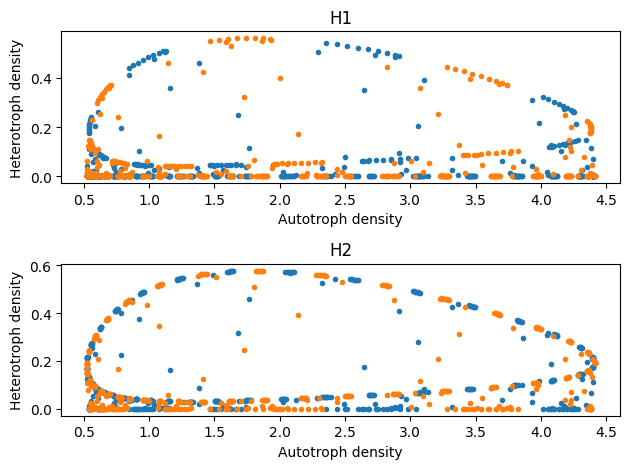

In [92]:
t_end = 20000
number_steps = 200
t = np.linspace(0, t_end, number_steps)
k_1 = 0
k_2 = 2
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(var[:,2],var[:,4],".")
ax1.plot(var[:,3],var[:,5],".")
ax1.set_xlabel("Autotroph density")
ax1.set_ylabel("Heterotroph density")
ax1.set_title("H1")
ax2.plot(var[:,2],var[:,6],".")
ax2.plot(var[:,3],var[:,7],".")
ax2.set_xlabel("Autotroph density")
ax2.set_ylabel("Heterotroph density")
ax2.set_title("H2")
plt.tight_layout()

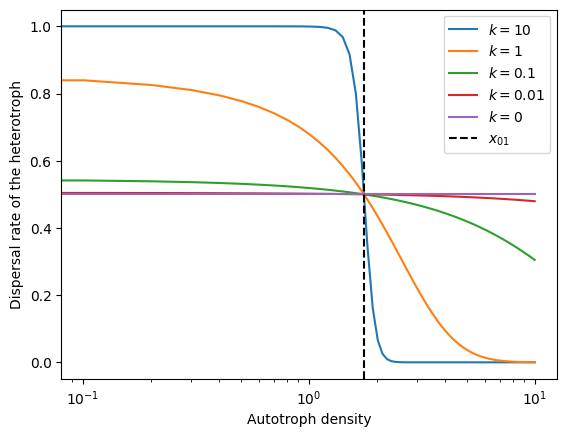

In [8]:
d_Hmax1 = 1
A_a_range = np.linspace(0, 10, 100)
x_01 = 0.3 / (1 * (0.33 - 0.53 * 0.3))
def dispersalrate(A_a):
    d_H1a = d_Hmax1 / (1 + np.exp(k * (A_a - x_01)))
    return (A_a, d_H1a)

k = 10
res10 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res10[:,0],res10[:,1], label="$k = $" + str(k))
k = 1
res1 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res1[:,0],res1[:,1], label="$k = $" + str(k))
k = 0.1
res01 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res01[:,0],res01[:,1], label="$k = $" + str(k))
k = 0.01
res001 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res001[:,0],res001[:,1], label="$k = $" + str(k))
k = 0
res0 = np.array([dispersalrate(a) for a in A_a_range])
plt.plot(res0[:,0],res0[:,1], label="$k = $" + str(k))
plt.axvline(x=x_01, color='black', linestyle='--', label="$x_{01}$")
#plt.yscale('log')
plt.xscale('log') 
# plt.ylim(0,1)
# plt.xlim(10**-1,10**1)
plt.xlabel('Autotroph density')
plt.ylabel('Dispersal rate of the heterotroph')
plt.legend()

## Invader

* At which value for the sensitivity $k$, can competitior 1 invade the resident population at fixation of the non-sensitive (randomly dispersing) competitor 2?
* Also, how does this change for increasing values of $k$ for both competitors?
* What time scale is appropriate to describe a successful invasion? (E.g. if not invaded after 20k+ time steps it's not a successful invasion)
* What is an appropriate density for an invader? Extinction threshold was earlier discussed to be at $10^{-6}$. 

Text(0.5, 1.0, '$d_{Hmax} = $0.001')

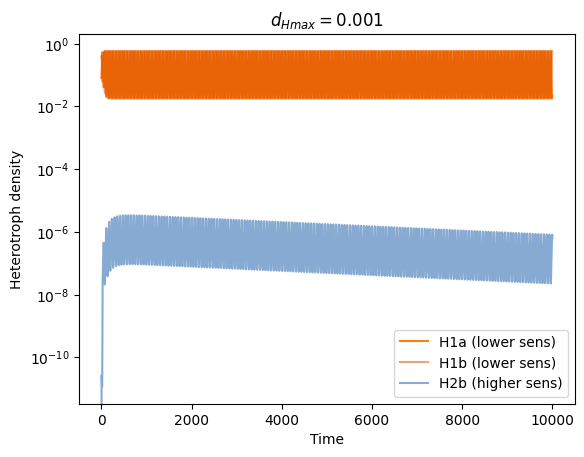

In [168]:
t_end = 10000
number_steps = 10000
t = np.linspace(0, t_end, number_steps)
k_1 = 0.1 # 2
k_2 = 5 # 0
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
#var0 = [2, 2.5, 2.5, 2, 0, 0, 0.4, 0.08, 0, 0, 0, 0, 0, 0]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

plt.plot(t[-25000:-1], (var[-25000:-1:, 4]),label="H1a (lower sens)", color="#FF7F0E")
plt.plot(t[-25000:-1], (var[-25000:-1:, 6]), label="H2a (higher sens)", color="#1F77B4")
plt.plot(t[-25000:-1], (var[-25000:-1:, 5]),label="H1b (lower sens)", color="#D44B00", alpha = 0.5)
plt.plot(t[-25000:-1], (var[-25000:-1:, 7]), label="H2b (higher sens)", color="#0F57A4", alpha = 0.5)
plt.yscale("log")
plt.legend()
plt.xlabel("Time")
plt.ylabel("Heterotroph density")
plt.title("$d_{Hmax} = $" + str(d_Hmax1))
#plt.xlim(0,25000)

In [6]:
H1a = np.loadtxt("./data/growthrateV210-3/H1a.csv", delimiter=",")

In [7]:
H1a

array([[-1.07564076e-05, -1.08027586e-05, -1.08537078e-05, ...,
        -8.79503071e-06, -8.77000317e-06, -8.74963584e-06],
       [-1.07563706e-05, -1.08027810e-05, -1.08537180e-05, ...,
        -8.79499096e-06, -8.77000453e-06, -8.74962209e-06],
       [-1.07563451e-05, -1.08027290e-05, -1.08536766e-05, ...,
        -8.79493798e-06, -8.76998225e-06, -8.74968327e-06],
       ...,
       [-1.07561306e-05, -1.08024689e-05, -1.08535033e-05, ...,
        -8.79482291e-06, -8.76973368e-06, -8.74945173e-06],
       [-1.07561161e-05, -1.08025356e-05, -1.08534772e-05, ...,
        -8.79485088e-06, -8.76980986e-06, -8.74951242e-06],
       [-1.07560774e-05, -1.08025059e-05, -1.08534444e-05, ...,
        -8.79486289e-06, -8.76988847e-06, -8.74948732e-06]])

Text(0.5, 0, 'Time')

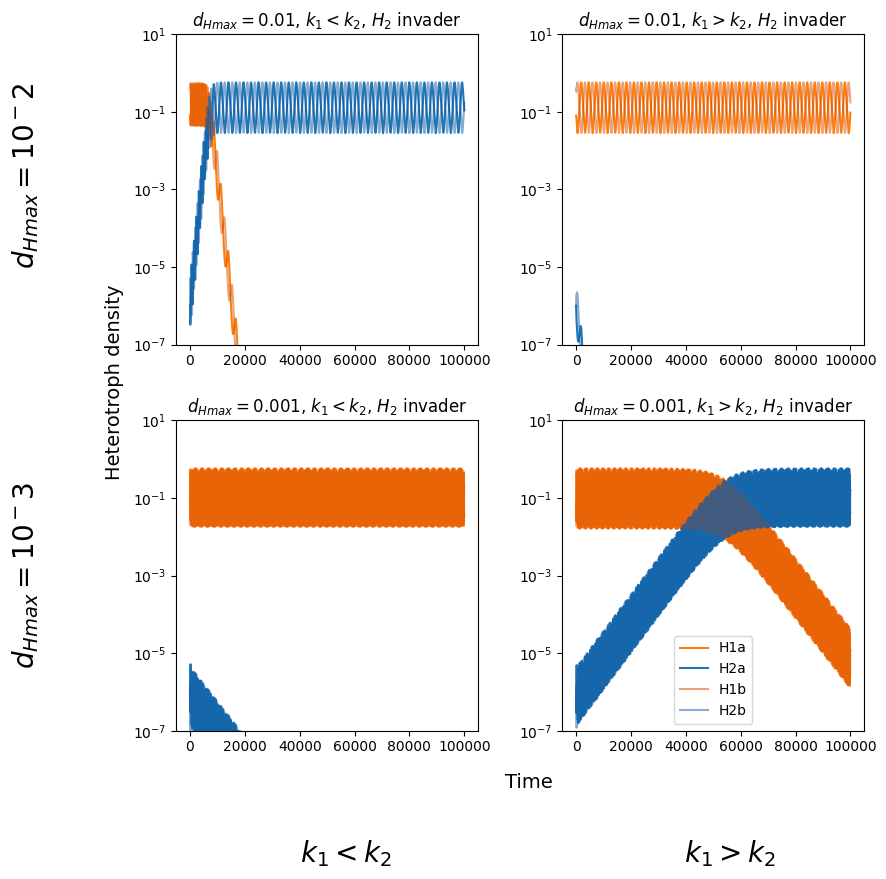

In [98]:
t_end = 100000
number_steps = 1000
t = np.linspace(0, t_end, number_steps)

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
#var0 = [2, 2.5, 2.5, 2, 0, 0, 0.4, 0.08, 0, 0, 0, 0, 0, 0]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 10**-6, 0, 0, 0, 0, 0, 0]
#plt.figure(figsize=(8,8))

fig, ((ax1, ax2), (ax3, ax4)) = plt.subplots(2, 2, figsize=(8,8))

k_1 = 0
k_2 = 5
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
ax1.plot(t, (var[:, 4]),label="H1a (lower sens)", color="#FF7F0E")
ax1.plot(t, (var[:, 6]), label="H2a (higher sens)", color="#1F77B4")
ax1.plot(t, (var[:, 5]),label="H1b (lower sens)", color="#D44B00", alpha = 0.5)
ax1.plot(t, (var[:, 7]), label="H2b (higher sens)", color="#0F57A4", alpha = 0.5)
ax1.set_title("$d_{Hmax} = $" + str(d_Hmax1) + ", $k_1 < k_2$, $H_2$ invader")
ax1.set_yscale("log")
ax1.set_ylim(10**-7,10**1)

k_1 = 5
k_2 = 0
d_Hmax1 = 10**-2
d_Hmax2 = 10**-2
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
ax2.plot(t, (var[:, 4]),label="H1a (lower sens)", color="#FF7F0E")
ax2.plot(t, (var[:, 6]), label="H2a (higher sens)", color="#1F77B4")
ax2.plot(t, (var[:, 5]),label="H1b (lower sens)", color="#D44B00", alpha = 0.5)
ax2.plot(t, (var[:, 7]), label="H2b (higher sens)", color="#0F57A4", alpha = 0.5)
ax2.set_title("$d_{Hmax} = $" + str(d_Hmax1) + ", $k_1 > k_2$, $H_2$ invader")
ax2.set_yscale("log")
ax2.set_ylim(10**-7,10**1)

k_1 = 0
k_2 = 5
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
ax3.plot(t, (var[:, 4]),label="H1a (lower sens)", color="#FF7F0E")
ax3.plot(t, (var[:, 6]), label="H2a (higher sens)", color="#1F77B4")
ax3.plot(t, (var[:, 5]),label="H1b (lower sens)", color="#D44B00", alpha = 0.5)
ax3.plot(t, (var[:, 7]), label="H2b (higher sens)", color="#0F57A4", alpha = 0.5)
ax3.set_title("$d_{Hmax} = $" + str(d_Hmax1) + ", $k_1 < k_2$, $H_2$ invader")
ax3.set_yscale("log")
ax3.set_ylim(10**-7,10**1)

k_1 = 5
k_2 = 0
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
ax4.plot(t, (var[:, 4]),label="H1a", color="#FF7F0E")
ax4.plot(t, (var[:, 6]), label="H2a", color="#1F77B4")
ax4.plot(t, (var[:, 5]),label="H1b", color="#D44B00", alpha = 0.5)
ax4.plot(t, (var[:, 7]), label="H2b", color="#0F57A4", alpha = 0.5)
ax4.set_title("$d_{Hmax} = $" + str(d_Hmax1) + ", $k_1 > k_2$, $H_2$ invader")
ax4.set_yscale("log")
ax4.set_ylim(10**-7,10**1)

plt.legend()
plt.tight_layout(pad=2.0)

# put text below the lower left graph
plt.figtext(0.3, -0.1, "$k_1 < k_2$", ha="center", fontsize=20)
plt.figtext(0.78, -0.1, "$k_1 > k_2$", ha="center", fontsize=20)
plt.figtext(-0.1, 0.65, "$d_{Hmax} = 10^-2$", ha="center", fontsize=20, rotation=90)
plt.figtext(-0.1, 0.15, "$d_{Hmax} = 10^-3$", ha="center", fontsize=20, rotation=90)

# common y label left
fig.text(0, 0.5, 'Heterotroph density', va='center', rotation='vertical', fontsize=14)
fig.text(0.5, 0, 'Time', va='center', fontsize=14)

It may be possible to calculate pips similar to how I implemented early density heatmaps.  
<br>
**Workflow**:  
* Run simulation with resident $H_1$ until fixation.
* Grab densities from resident $H_1$ at last time step (at fixation).
* Run simulation with resident $H_1$ at fixation and introduce mutant $H_2$ at low density on one patch ($10^{-6}$)
* Plot relationship of the total densities of $H_1$ and $H_2$ at the last time step (e.g. $H_1 - H_2$).
  * If the value is positive there was no invasion, and if the value is negative there was an invasion. 

In [ ]:
# start timeseries with densities of H2 at fixation (e.g. 10000 time steps)
# not sure if necessary because no transient dynamics visible?
fixH_2a = var[-1, 6]
fixH_2b = var[-1, 7]

At $d_{Hmax} = 10^{-3}$, a rare mutant can not invade the system regardless of sensitivity of both competitors (even at $k_1 = 15$ and  $t_{end} = 200k$)
This changes at $d_{Hmax} = 10^{-2}$. Here, the rare mutant can invade the the randomly dispersing resident if the mutant has a higher sensitivity than the resident competitor.  
If $d_{Hmax} > 10^{-2}$ invasions remain possible, but become static for higher values.

In [363]:
t_end = 15000 #4000  # 100000
number_steps = 200#0 #2000  # 25000
t = np.linspace(0, t_end, number_steps)
# dispersal adaptability
k_1 = 0
k_2 = 0
k_1_range = np.geomspace(0.1, 10, 50)
k_2_range = np.geomspace(0.1, 10, 50)
# maximum dispersal rate
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
d_Hmax1_range = np.logspace(-3, -1, 250)
d_Hmax2_range = k_1_range # d_Hmax1_range

# var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

In [364]:
meandensity_H1x = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
meandensity_H1y = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
meandensity_H2x = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
meandensity_H2y = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
total_H1 = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
total_H2 = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
invasion = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
H1a = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
H1b = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
H2a = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))
H2b = np.zeros((len(d_Hmax2_range), len(d_Hmax2_range)))

In [ ]:
# Integrating over two variable parameters
# change for new method with equation wrapper

var = []

i = 0
j = 0

for k_2 in tqdm(k_2_range):
    j = 0
    for k_1 in k_1_range:
        model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

        # results[i,j] = ...
        meandensity_H1x[i, j] = np.mean(var[-200:-1, 4])
        meandensity_H1y[i, j] = np.mean(var[-200:-1, 5])
        meandensity_H2x[i, j] = np.mean(var[-200:-1, 6])
        meandensity_H2y[i, j] = np.mean(var[-200:-1, 7])
        total_H1[i, j] = np.mean(var[-200:-1, 4]) + np.mean(var[-200:-1, 5])
        total_H2[i, j] = np.mean(var[-200:-1, 6]) + np.mean(var[-200:-1, 7])
        #invasion[i, j] = total_H1[i, j] - total_H2[i, j]

        j += 1
    i += 1

In [365]:
# Integrating over two variable parameters
# change for new method with equation wrapper
from scipy.stats import linregress
var = []

i = 0
j = 0

for k_2 in tqdm(k_2_range):
    j = 0
    for k_1 in k_1_range:
        model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

        # results[i,j] = ...
        meandensity_H1x[i, j] = np.mean(var[-200:-1, 4])
        meandensity_H1y[i, j] = np.mean(var[-200:-1, 5])
        meandensity_H2x[i, j] = np.mean(var[-200:-1, 6])
        meandensity_H2y[i, j] = np.mean(var[-200:-1, 7])
        #invasion[i, j] = total_H1[i, j] - total_H2[i, j]

        slope, intercept, r_value, p_value, std_err = linregress(t[-200:-1],var[-200:-1, 4])
        H1a[i, j] = slope
        slope, intercept, r_value, p_value, std_err = linregress(t[-200:-1],var[-200:-1, 5])
        H1b[i, j] = slope
        slope, intercept, r_value, p_value, std_err = linregress(t[-200:-1],var[-200:-1, 6])
        H2a[i, j] = slope
        slope, intercept, r_value, p_value, std_err = linregress(t[-200:-1],var[-200:-1, 7])
        H2b[i, j] = slope
        j += 1
    i += 1

100%|██████████| 50/50 [1:32:29<00:00, 110.98s/it]


In [368]:
# np.savetxt("./data/growthrate10-3/H1a.csv", H1a, delimiter=",")
# np.savetxt("./data/growthrate10-3/H1b.csv", H1b, delimiter=",")
# np.savetxt("./data/growthrate10-3/H2a.csv", H2a, delimiter=",")
# np.savetxt("./data/growthrate10-3/H2b.csv", H2b, delimiter=",")

Text(0.1, -0.05, 'simname: invasion10-2')

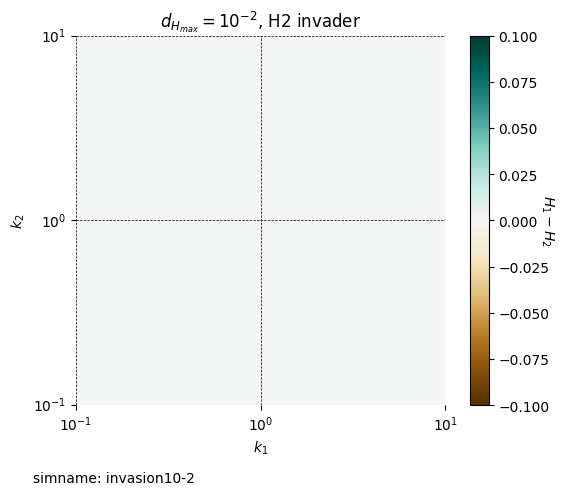

In [369]:
k_1_range = np.geomspace(0.1, 10, 50)
ticks = np.append(k_1_range, 10)
ax1 = sns.heatmap(invasion, cmap="BrBG", square = True,cbar=False) # vmin=-0.4,vmax=0.4,    
cbar = ax1.figure.colorbar(ax1.collections[0])
cbar.set_label('$H_1 - H_2$', rotation=270)
ax1.set_xticks(np.linspace(0, len(k_1_range), 3))
ax1.set_yticks(np.linspace(0, len(k_1_range), 3))
ax1.invert_yaxis()
ax1.set_xticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"), rotation=0)
ax1.set_yticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('$d_{H_{max}} = 10^{-2}$, H2 invader')
plt.figtext(0.1, -0.05, "simname: invasion10-2")

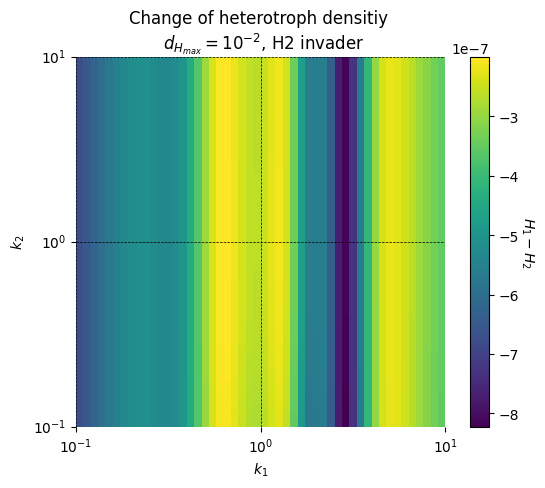

In [370]:
k_1_range = np.geomspace(0.1, 10, 50)
ticks = np.append(k_1_range, 10)
ax1 = sns.heatmap((H1a+H1b)-(H2a+H2b), cmap="viridis", square = True,cbar=False)
cbar = ax1.figure.colorbar(ax1.collections[0])
cbar.set_label('$H_1 - H_2$', rotation=270, labelpad=12)
ax1.set_xticks(np.linspace(0, len(k_1_range), 3))
ax1.set_yticks(np.linspace(0, len(k_1_range), 3))
ax1.invert_yaxis()
ax1.set_xticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"), rotation=0)
ax1.set_yticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('Change of heterotroph densitiy \n $d_{H_{max}} = 10^{-2}$, H2 invader')

Text(0.5, 1.0, 'Growth rate of $H_1$ \n $d_{H_{max}} = 10^{-2}$, H2 invader')

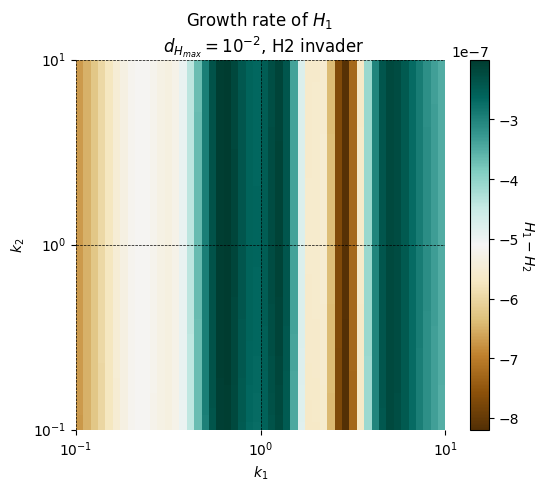

In [371]:
k_1_range = np.geomspace(0.1, 10, 50)
ticks = np.append(k_1_range, 10)
#ax1 = sns.heatmap((H1a+H1b)-(H2a+H2b), cmap="viridis", square = True,cbar=False) # vmin=-0.4,vmax=0.4,    
ax1 = sns.heatmap((H1b+H1a), cmap="BrBG", square = True,cbar=False)
cbar = ax1.figure.colorbar(ax1.collections[0])
cbar.set_label('$H_1 - H_2$', rotation=270, labelpad=12)
ax1.set_xticks(np.linspace(0, len(k_1_range), 3))
ax1.set_yticks(np.linspace(0, len(k_1_range), 3))
ax1.invert_yaxis()
ax1.set_xticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"), rotation=0)
ax1.set_yticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('Growth rate of $H_1$ \n $d_{H_{max}} = 10^{-2}$, H2 invader')

In [237]:
#invasion = (meandensity_H1x+meandensity_H1y) - (meandensity_H2x+meandensity_H2y)
#np.savetxt("./data/invasion10-3.csv", invasion, delimiter=",")
invasion = np.loadtxt("./data/invasion10-2.csv", delimiter=",")

Text(0.1, -0.05, 'simname: invasion10-2')

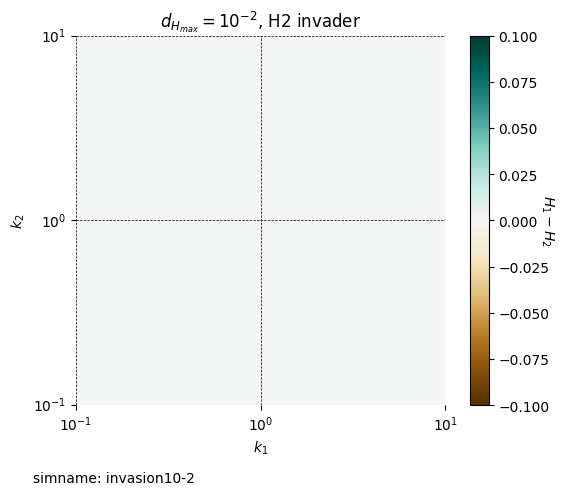

In [372]:
k_1_range = np.geomspace(0.1, 10, 50)
ticks = np.append(k_1_range, 10)
ax1 = sns.heatmap(invasion, cmap="BrBG", square = True,cbar=False) # vmin=-0.4,vmax=0.4,    
cbar = ax1.figure.colorbar(ax1.collections[0])
cbar.set_label('$H_1 - H_2$', rotation=270)
ax1.set_xticks(np.linspace(0, len(k_1_range), 3))
ax1.set_yticks(np.linspace(0, len(k_1_range), 3))
ax1.invert_yaxis()
ax1.set_xticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"), rotation=0)
ax1.set_yticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('$d_{H_{max}} = 10^{-2}$, H2 invader')
plt.figtext(0.1, -0.05, "simname: invasion10-2")

Text(0.1, -0.05, 'simname: invasion10-3')

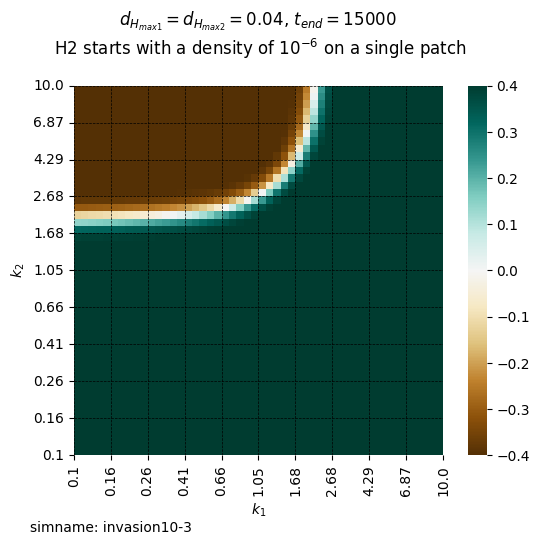

In [164]:
k_1_range = np.geomspace(0.1, 10, 50)
ticks = np.append(k_1_range, 10)
ax1 = sns.heatmap(invasion, cmap="BrBG", square = True, vmin=-0.4,vmax=0.4) #
ax1.set_xticks(np.linspace(0, len(k_1_range), 11))
ax1.set_yticks(np.linspace(0, len(k_1_range), 11))
ax1.invert_yaxis()
ax1.set_xticklabels(np.round(ticks[::5], 2))
ax1.set_yticklabels(np.round(ticks[::5], 2))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('$d_{H_{max1}} = d_{H_{max2}} = 0.04$, $t_{end} = 15000$ \n H2 starts with a density of $10^{-6}$ on a single patch \n')
plt.figtext(0.1, -0.05, "simname: invasion10-3")

Text(0.15, -0.05, 'simname: invasion10-3')

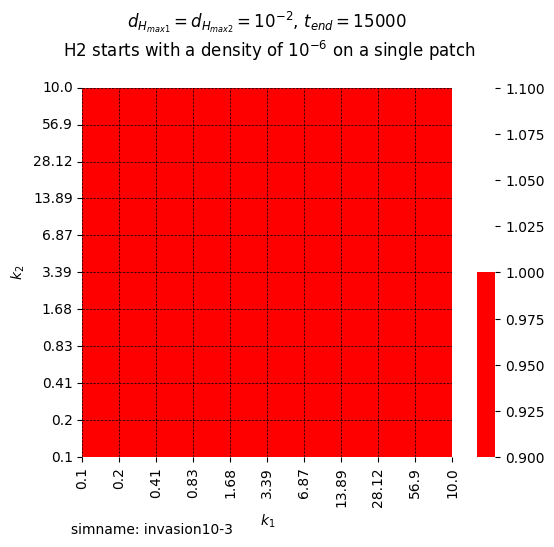

In [128]:
pipvasion = np.where(invasion >= 0, 1, 0)
ax1 = sns.heatmap(pipvasion, cmap=sns.color_palette(["red", "white"]), cbar=True, square = True) #
ax1.set_xticks(np.linspace(0, len(k_1_range), 11))
ax1.set_yticks(np.linspace(0, len(k_1_range), 11))
ax1.invert_yaxis()
ax1.set_xticklabels(np.round(ticks[::5], 2))
ax1.set_yticklabels(np.round(ticks[::5], 2))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('$d_{H_{max1}} = d_{H_{max2}} = 10^{-2}$, $t_{end} = 15000$ \n H2 starts with a density of $10^{-6}$ on a single patch \n')
plt.figtext(0.15, -0.05, "simname: invasion10-3")

At 10-3 no invasions possible at all. Even at same or higher sensitivity discrepancy, recovery from low densities is not possible.

Find max dispersal speed dHmax at which invasions are possible (at some point between 10-3 and 10-2)

- Do the above again but for longer  
- Do above again for intermediate dHmax e.g. 5x10^-3  
    - how do invasions change over a range of dHmax (between 10-3 and 10-2 because here, its changing)
    - time series for # of invasions (e.g. number of negative values) over a range of dHmax 

In [91]:
t_end = 15000 #4000  # 100000
number_steps = 2000 #2000  # 25000
t = np.linspace(0, t_end, number_steps)
# dispersal adaptability
k_1 = 0
k_2 = 0
k_range = np.geomspace(0.1, 10, 25)
# maximum dispersal rate
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3
d_Hmax_range = np.logspace(-3, -1, 10)

# var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

In [43]:
meandensity_H1x = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
meandensity_H1y = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
meandensity_H2x = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
meandensity_H2y = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
total_H1 = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
total_H2 = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
invasion = np.zeros((len(k_range), len(k_range), len(d_Hmax_range)))
invasion_sum = np.zeros(len(d_Hmax_range))

In [8]:
var = []

i = 0
j = 0
k = 0

for d_Hmax1 in tqdm(d_Hmax_range):
    i = 0
    d_Hmax2 = d_Hmax1
    for k_2 in k_range:
        j = 0
        for k_1 in k_range:
            model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
            var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

            total_H1[i, j, k] = np.mean(var[-200:-1, 4]) + np.mean(var[-200:-1, 5])
            total_H2[i, j, k] = np.mean(var[-200:-1, 6]) + np.mean(var[-200:-1, 7])
            invasion[i, j, k] = total_H1[i, j, k] - total_H2[i, j, k]
            j += 1
        i += 1
    k += 1

100%|██████████| 10/10 [2:52:20<00:00, 1034.05s/it] 


In [111]:
invasionsum = []
for k_idx in range(invasion.shape[2]): # shape[2] returns the 3rd dimension of the array (in this case k) 
    num_negative = np.sum(invasion[:, :, k_idx] < 0)  # Count negative entries for current k
    invasionsum.append(num_negative)

invasionsum = np.array(invasionsum)

In [89]:
#np.savetxt("./data/invasionsum/invasion.csv", invasion, delimiter=",")
#np.savetxt("./data/invasionsum/invasionsum.csv", invasionsum, delimiter=",")
invasionsum = np.loadtxt("./data/invasionsum/invasionsum.csv", delimiter=",")
# change invasion_sum to percentage

In [ ]:
plt.plot(d_Hmax_range, ((invasionsum*100)/(len(k_range)**2)), "x", markersize=8)
plt.xscale("log")
plt.ylabel("percentage of scenarios with invasion")
plt.xlabel("$d_{H_{max1}} = d_{H_{max2}}$")

do this in C i guess  
otherwise it would take 24 hours or so

In [69]:
d_Hmax_range

array([0.001     , 0.0016681 , 0.00278256, 0.00464159, 0.00774264,
       0.0129155 , 0.02154435, 0.03593814, 0.05994843, 0.1       ])

Text(0.5, 1.0, '$d_{H_{max1}} = d_{H_{max2}} = $0.00138, $t_{end} = 15000$ \n H2 starts with a density of $10^{-6}$ on a single patch \n')

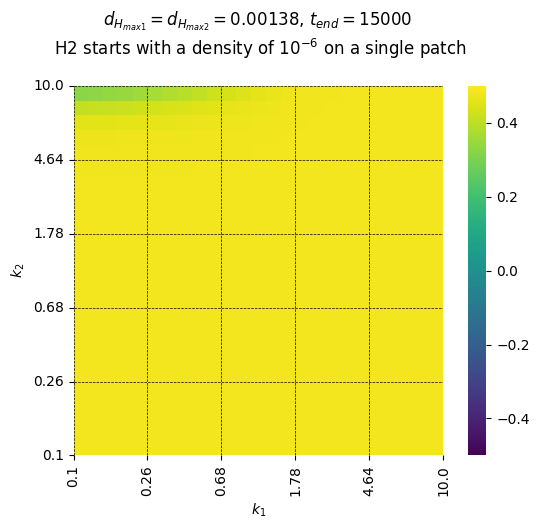

In [144]:
nr = 7
invasionsum = np.loadtxt("./data/invasionsum/invasion00359.csv", delimiter=",")
ticks = []
ticks = np.append(k_range, 10)
ax1 = sns.heatmap(invasionsum, cmap="viridis", square = True, vmax=0.5, vmin=-0.5) #
ax1.set_xticks(np.linspace(0, len(k_range), 6))
ax1.set_yticks(np.linspace(0, len(k_range), 6))
ax1.invert_yaxis()
ax1.set_xticklabels(np.round(ticks[::5], 2))
ax1.set_yticklabels(np.round(ticks[::5], 2))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('$d_{H_{max1}} = d_{H_{max2}} = $' + str(round(d_Hmax_range[nr], 5)) + ', $t_{end} = 15000$ \n H2 starts with a density of $10^{-6}$ on a single patch \n')
# plt.figtext(0.1, -0.05, "simname: invasion10-3")

Text(0.5, 1.0, '$d_{H_{max1}} = d_{H_{max2}} = $0.03594, $t_{end} = 15000$ \n H2 starts with a density of $10^{-6}$ on a single patch \n')

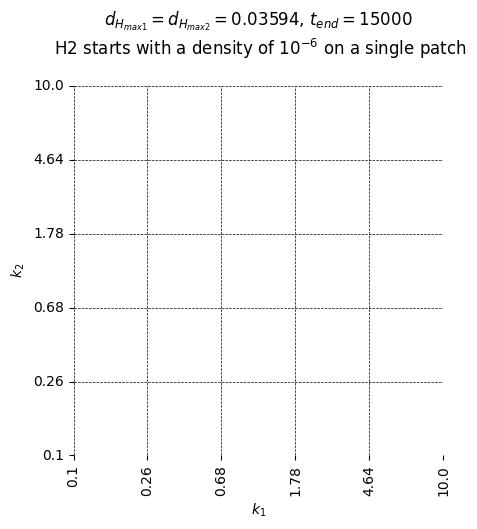

In [85]:
ticks = []
ticks = np.append(k_range, 10)
pipvasion = np.where(invasionsum >= 0, 1, -1)
ax1 = sns.heatmap(pipvasion, cmap=sns.color_palette(["red", "white"]), cbar=False, square = True) #
ax1.set_xticks(np.linspace(0, len(k_range), 6))
ax1.set_yticks(np.linspace(0, len(k_range), 6))
ax1.invert_yaxis()
ax1.set_xticklabels(np.round(ticks[::5], 2))
ax1.set_yticklabels(np.round(ticks[::5], 2))
plt.grid(color='black', linewidth=0.5, linestyle='--')
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
plt.title('$d_{H_{max1}} = d_{H_{max2}} = $' + str(round(d_Hmax_range[nr], 5)) + ', $t_{end} = 15000$ \n H2 starts with a density of $10^{-6}$ on a single patch \n')
#plt.figtext(0.15, -0.05, "simname: invasion10-3")

In [115]:
t_end = 15000
number_steps = 2000 #2000  # 25000
t = np.linspace(0, t_end, number_steps)
# dispersal adaptability
k_1 = 0# 3*10**-3
k_2 = 2#5*10**0
# maximum dispersal rate
d_Hmax_range = np.logspace(-3, -1, 100)

meandensity_H1x = np.zeros((len(d_Hmax_range)))
meandensity_H1y = np.zeros((len(d_Hmax_range)))
meandensity_H2x = np.zeros((len(d_Hmax_range)))
meandensity_H2y = np.zeros((len(d_Hmax_range)))

# var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

# Integrating over one variable parameter
i = 0
j = 0

for d_Hmax1 in tqdm(d_Hmax_range):
    d_Hmax2 = d_Hmax1
    model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

    # results[i,j] = ...
    meandensity_H1x[i] = np.mean(var[-200:-1, 4])
    meandensity_H1y[i] = np.mean(var[-200:-1, 5])
    meandensity_H2x[i] = np.mean(var[-200:-1, 6])
    meandensity_H2y[i] = np.mean(var[-200:-1, 7])

    i += 1

100%|██████████| 100/100 [02:35<00:00,  1.55s/it]


Text(0.5, 1.0, 'H2 starts with a density of $10^{-6}$ on a single patch. \n$k_1 = $0, $k_2 = $2')

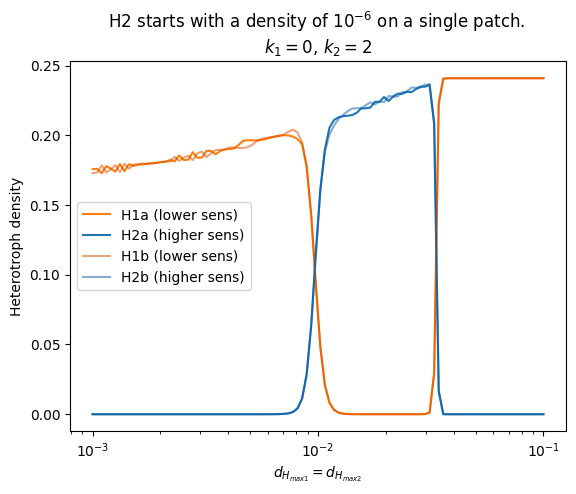

In [116]:
plt.plot(d_Hmax_range, meandensity_H1x, label="H1a (lower sens)", color="#FF7F0E")
plt.plot(d_Hmax_range, meandensity_H2x, label="H2a (higher sens)", color="#1F77B4")
plt.plot(d_Hmax_range, meandensity_H1y, label="H1b (lower sens)", color="#D44B00", alpha = 0.5)
plt.plot(d_Hmax_range, meandensity_H2y, label="H2b (higher sens)", color="#0F57A4", alpha = 0.5)
plt.xscale("log")
plt.xlabel("$d_{H_{max1}} = d_{H_{max2}}$")
plt.ylabel("Heterotroph density")
plt.legend()
plt.title("H2 starts with a density of $10^{-6}$ on a single patch. \n" +
          "$k_1 = $" + str(k_1) + ", $k_2 = $" + str(k_2))   

## Nachtrag

Text(0.5, 0.98, '$d_{Hmax} = $0.01, H1 invader')

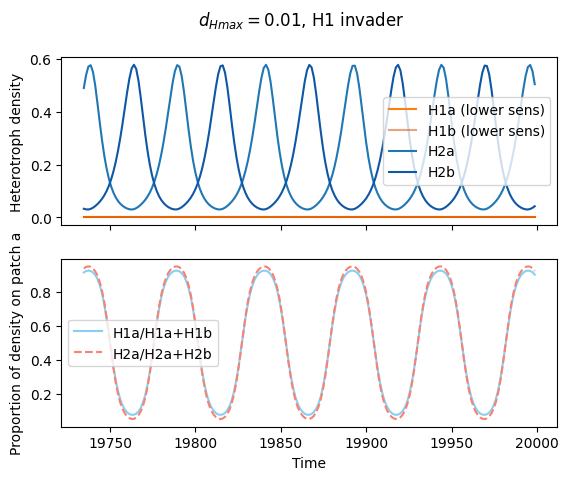

In [125]:
# dH1a/dH1a+dH1b
# this is the proportion change of H1 in patch a compared to the total change in H1 in the system
# If ~1, most of the change occured in patch a. If ~0, most of the change occured in patch b.
# If ~0.5, the change was evenly distributed between patches.
# Gives insights about the relative importance of each patch in influencing H1 density.
t_end = 20000
number_steps = 15000
t = np.linspace(0, t_end, number_steps)
k_1 = 0
k_2 = 2
d_Hmax1 = 10**-2
d_Hmax2 = d_Hmax1
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
#var0 = [2, 2.5, 2.5, 2, 0, 0, 0.4, 0.08, 0, 0, 0, 0, 0, 0]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0] # H2 invader
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

fig, (ax1, ax2) = plt.subplots(2)
ax1.plot(t[-200:-1], (var[-200:-1:, 4]),label="H1a (lower sens)", color="#FF7F0E")
ax1.plot(t[-200:-1], (var[-200:-1:, 5]),label="H1b (lower sens)", color="#D44B00", alpha = 0.5)
ax1.plot(t[-200:-1], (var[-200:-1:, 6]),label="H2a", color="#1F77B4")
ax1.plot(t[-200:-1], (var[-200:-1:, 7]),label="H2b", color="#0F57A4")
ax1.get_xaxis().set_ticklabels([])
ax1.set_ylabel("Heterotroph density")
ax1.legend()

ax2.plot(t[-200:-1], (var[-200:-1:, 4]/(var[-200:-1:, 4]+var[-200:-1:, 5])),label="H1a/H1a+H1b", color="#89CFF0")
ax2.plot(t[-200:-1], (var[-200:-1:, 6]/(var[-200:-1:, 6]+var[-200:-1:, 7])),"--", label="H2a/H2a+H2b", color="#FA8072")
ax2.legend()
ax2.set_xlabel("Time")
ax2.set_ylabel("Proportion of density on patch a")
fig.suptitle("$d_{Hmax} = $" + str(d_Hmax1) + ", H2 invader")

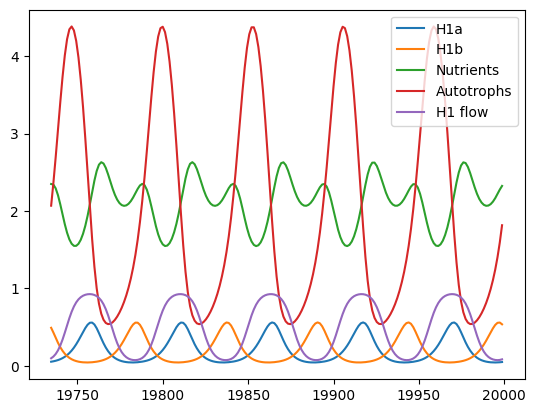

In [113]:
t_end = 20000
number_steps = 15000
t = np.linspace(0, t_end, number_steps)
k_1 = 0
k_2 = 2
d_Hmax1 = 10**-1
d_Hmax2 = d_Hmax1
#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
#var0 = [2, 2.5, 2.5, 2, 0, 0, 0.4, 0.08, 0, 0, 0, 0, 0, 0]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0] # H2 invader
#plt.figure(figsize=(8,8))
var = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

plt.plot(t[-200:-1], var[-200:-1:, 4],label="H1a")
plt.plot(t[-200:-1], var[-200:-1:, 5],label="H1b")
plt.plot(t[-200:-1], var[-200:-1:, 0], label="Nutrients")
plt.plot(t[-200:-1], var[-200:-1:, 2], label="Autotrophs")
plt.plot(t[-200:-1], (var[-200:-1:, 4]/(var[-200:-1:, 4]+var[-200:-1:, 5])), label="H1 flow")
plt.legend()

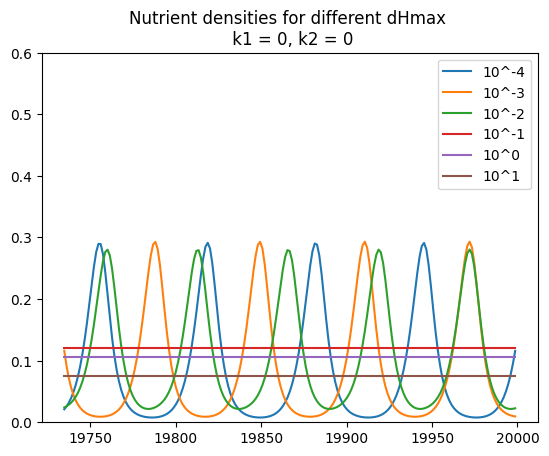

In [22]:
t_end = 20000
number_steps = 15000
t = np.linspace(0, t_end, number_steps)
k_1 = 0
k_2 = 0

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
var = []
d_Hmax1 = 10**-4
d_Hmax2 = d_Hmax1
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
plt.plot(t[-200:-1], var[-200:-1:, 4], label="10^-4")
d_Hmax1 = 10**-3
d_Hmax2 = d_Hmax1
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
plt.plot(t[-200:-1], var[-200:-1:, 4], label="10^-3")
d_Hmax1 = 10**-2
d_Hmax2 = d_Hmax1
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
plt.plot(t[-200:-1], var[-200:-1:, 4], label="10^-2")
d_Hmax1 = 10**-1
d_Hmax2 = d_Hmax1
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
plt.plot(t[-200:-1], var[-200:-1:, 4], label="10^-1")
d_Hmax1 = 10**0
d_Hmax2 = d_Hmax1
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
plt.plot(t[-200:-1], var[-200:-1:, 4], label="10^0")
d_Hmax1 = 10**1
d_Hmax2 = d_Hmax1
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
plt.plot(t[-200:-1], var[-200:-1:, 4], label="10^1")
plt.title("Nutrient densities for different dHmax \n k1 = " + str(k_1) + ", k2 = " + str(k_2))# + ", H2 invader")
plt.ylim(0,0.6)
plt.legend()

In [70]:
k_1 = 0
k_2 = 0
d_Hmax1 = 10**1
d_Hmax2 = d_Hmax1
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

In [1]:
print(np.mean(var[-200:-1, 0]), np.mean(var[-200:-1, 1]),np.mean(var[-200:-1, 0])+np.mean(var[-200:-1, 1]))

NameError: name 'np' is not defined

## Autotroph Copies

In [125]:
t_end = 500
number_steps = 500
t = np.linspace(0, t_end, number_steps)
k_1 = 0
k_2 = 0

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.008, 0.04, 0.008, 0.04, 0, 0, 0, 0, 0, 0]
var = []
d_Hmax1 = 10**-3
d_Hmax2 = d_Hmax1
d_Hmax_range = np.logspace(-3,1,100)
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

autodensity_Ax = np.zeros((len(t),len(d_Hmax_range)))
autodensity_Ay = np.zeros((len(t), len(d_Hmax_range)))

# Integrating over one variable parameter
i = 0
j = 1

for d_Hmax1 in tqdm(d_Hmax_range):
    d_Hmax2 = d_Hmax1
    model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

    # results[i,j] = ...
    autodensity_Ax[:,i] = var[:,2]
    autodensity_Ay[:,i] = var[:,3]

    i += 1

100%|██████████| 100/100 [00:04<00:00, 22.99it/s]


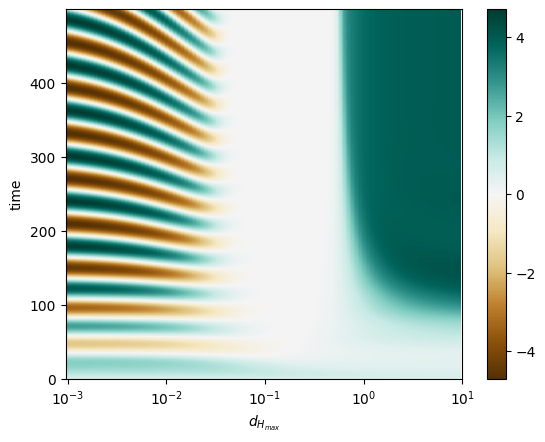

In [126]:
fig,ax = plt.subplots(1)
im = ax.imshow(autodensity_Ax-autodensity_Ay, cmap='BrBG', aspect='auto', origin="lower")
plt.colorbar(im)
ax.set_xlabel("$d_{H_{max}}$")
ax.set_ylabel("time")
ax.set_xticks(np.linspace(0, len(d_Hmax_range), 5))
ax.set_xticklabels(["$10^{-3}$", "$10^{-2}$", "$10^{-1}$", "$10^{0}$", "$10^{1}$"])
plt.show()

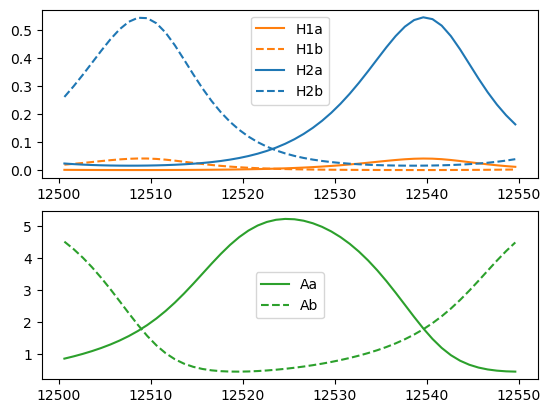

In [23]:
#fig, ((ax1, ax3),(ax2,ax4)) = plt.subplots(2,2)
fig, (ax1,ax2)=plt.subplots(2)
t_end = 20000
number_steps = 20000
t = np.linspace(0, t_end, number_steps)


#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]


start = 12500
end = 12550

var = []
k_1 = 5
k_2 = 0
d_Hmax1 = 0.001
d_Hmax2 = 0.001
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

ax1.plot(t[start:end], var[start:end, 4], label="H1a",color="tab:orange")
ax1.plot(t[start:end], var[start:end, 5], label="H1b",color="tab:orange", linestyle="--")
ax1.plot(t[start:end], var[start:end, 6], label="H2a",color="tab:blue")
ax1.plot(t[start:end], var[start:end, 7], label="H2b",color="tab:blue", linestyle="--")
ax1.legend()
#ax1.set_yscale("log")
ax2.plot(t[start:end], var[start:end:, 2], label="Aa",color="tab:green")
ax2.plot(t[start:end], var[start:end:, 3], label="Ab",color="tab:green", linestyle="--")
ax2.legend()

# var = []
# k_1 = 0
# k_2 = 2
# d_Hmax1 = 0.001
# d_Hmax2 = 0.01
# model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
# var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

# ax3.plot(t[start:end], var[start:end, 4], label="H1a",color="tab:orange")
# ax3.plot(t[start:end], var[start:end, 5], label="H1b",color="tab:orange", linestyle="--")
# ax3.plot(t[start:end], var[start:end, 6], label="H2a",color="tab:blue")
# ax3.plot(t[start:end], var[start:end, 7], label="H2b",color="tab:blue", linestyle="--")
# ax3.legend()
# #ax3.set_yscale("log")
# ax4.plot(t[start:end], var[start:end:, 2], label="Aa",color="tab:green")
# ax4.plot(t[start:end], var[start:end:, 3], label="Ab",color="tab:green", linestyle="--")

## S10

In [148]:
t_end = 500
number_steps = 500
t = np.linspace(0, t_end, number_steps)
k_1 = 2
k_2 = 0

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
var = []
d_Hmax1 = 10**-3
d_Hmax2 = d_Hmax1
d_Hmax_range = np.logspace(-3,1,100)
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

H1max = np.zeros((len(d_Hmax_range)))
H1min = np.zeros((len(d_Hmax_range)))
H2max = np.zeros((len(d_Hmax_range)))
H2min = np.zeros((len(d_Hmax_range)))
# Integrating over one variable parameter
i = 0

for d_Hmax1 in tqdm(d_Hmax_range):
    d_Hmax2 = 0.001
    model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
    var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

    # results[i,j] = ...
    H1max[i] = max(var[:, 4]+var[:, 5])
    H1min[i] = min(var[:, 4]+var[:, 5])
    H2max[i] = max(var[:, 6]+var[:, 7])
    H2min[i] = min(var[:, 6]+var[:, 7])
    

    i += 1

100%|██████████| 100/100 [00:04<00:00, 20.66it/s]


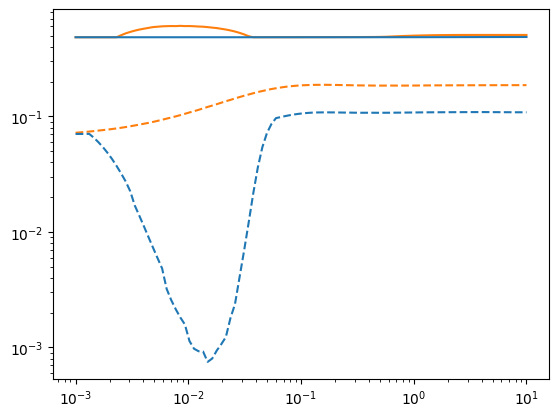

In [149]:
plt.plot(d_Hmax_range, H1max,color="tab:orange")    
plt.plot(d_Hmax_range, H1min,color="tab:orange", linestyle="--")    
plt.plot(d_Hmax_range, H2max,color="tab:blue")  
plt.plot(d_Hmax_range, H2min,color="tab:blue", linestyle="--")  
plt.xscale("log")
plt.yscale("log")

## Extrema

In [38]:
def find_maxima(x,n):
    """ returns an array with n extreme values of x"""
    
    max_index = signal.argrelmax(x)[0]         # create array with indices of local maxima of x
    
    #ext_index = np.append(max_index)           # array with indices of local extrema in x
    #ext_index = np.sort(ext_index)             # sort array (alternating minima and maxima)
    extrema = x[max_index]                     # array with the actual values of the extrema
       
    if len(extrema) == 0:                      # if all values in x are the same and no extremum is found:
        extrema = np.append(extrema,x[-1])     #   return last value of x in this case
    while len(extrema) < n:                    # if less than n extrema have been found:
        extrema = np.append(extrema,extrema[0])#   repeat last extremum until array has n elements
    while len(extrema) > n:                    # if more than n extrema have been found:
        extrema = np.delete(extrema,-1)        #   delete elements until arrays has n elements
        
    return extrema

In [5]:
t_end = 10000
number_steps = 10000
t = np.linspace(0, t_end, number_steps)

k_1_range = np.geomspace(0.1, 10, 50)
k_2_range = np.geomspace(0.1, 10, 50)

#var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 0.08, 0.4, 0, 0, 0, 0, 0, 0]
var = []
d_Hmax1 = 10**-3
d_Hmax2 = d_Hmax1

model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)

num_extr = 20 # set number of maxima to be found

slopeH2 = np.zeros((len(k_1_range), len(k_2_range)))

H1_extr = []
H2_extr = []
H1a_extr = []
H1b_extr = []
H2a_extr = []
H2b_extr = []

# Integrating over two variable parameter
i = 0
j = 0

for k_2 in tqdm(k_2_range):
    j = 0
    for k_1 in k_1_range:
        model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

        # results[i,j] = ...
        
        # H1_extr.append(find_maxima(var[:, 4]+var[:, 5],num_extr))
        H2_extr.append(find_maxima(var[:, 6]+var[:, 6],num_extr))
        # H1a_extr.append(find_maxima(var[:, 4],num_extr))
        # H1b_extr.append(find_maxima(var[:, 5],num_extr))
        # H2a_extr.append(find_maxima(var[:, 6],num_extr))
        # H2b_extr.append(find_maxima(var[:, 7],num_extr))

        slopeH2[i, j] = linregress(np.linspace(0, 9, 10),H2_extr[0][10:num_extr])[0]
        H2_extr = []
        j += 1
    i += 1

NameError: name 'k_1' is not defined

### How many maxima?

In [126]:
t_end = 10000
number_steps = 10000
t = np.linspace(0, t_end, number_steps)
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]
d_Hmax1 = 10**-3
d_Hmax2 = d_Hmax1

num_extr = 20
k_1 = 5
k_2 = 0
H2a_extr = []
H2b_extr = []
H2_extr = []
H1a_extr = []
H1b_extr = []
H1_extr = []
model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))
H2a_extr.append(find_maxima(var[:, 6],num_extr))
H2b_extr.append(find_maxima(var[:, 7],num_extr))
H2_extr.append(find_maxima(var[:, 6]+var[:, 6],num_extr))
H1a_extr.append(find_maxima(var[:, 4],num_extr))
H1b_extr.append(find_maxima(var[:, 5],num_extr))
H1_extr.append(find_maxima(var[:, 4]+var[:, 5],num_extr))
H1a = var[:, 4]
H2a = var[:, 6]

In [127]:
linregress(np.linspace(0, 9, 10),H2_extr[0][10:num_extr])[0]

1.007560192589321e-07

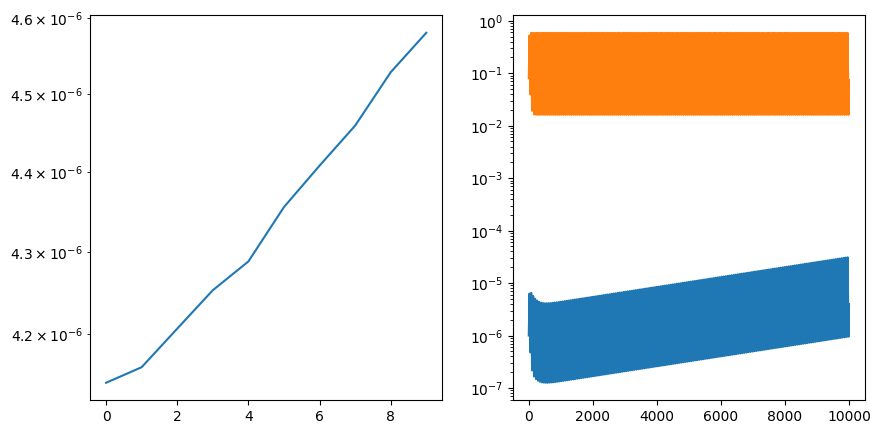

In [110]:
# make a figure with 2 plots
fig, (ax1, ax2) = plt.subplots(1,2, figsize=(10,5))
#ax1.plot(H1a_extr[0][10:num_extr], color="tab:orange")
ax1.plot(H2a_extr[0][10:num_extr], color="tab:blue")
ax1.set_yscale("log")

ax2.plot(t, H1a, label="H1a", color="tab:orange")
ax2.plot(t, H2a, label="H2a", color="tab:blue")
ax2.set_yscale("log")

In [3]:
t_end = 1000#0 
number_steps = 1000#0 
t = np.linspace(0, t_end, number_steps)

# dispersal adaptability
k_1_range = np.geomspace(0.1, 10, 5)
k_2_range = np.geomspace(0.1, 10, 5)

# maximum dispersal rate
d_Hmax1 = 10**-3
d_Hmax2 = 10**-3

# var = [N_a, N_b, A_a, A_b, H_1a, H_1b, H_2a, H_2b]
var0 = [2, 2.5, 2.5, 2, 0.08, 0.4, 10**-6, 0, 0, 0, 0, 0, 0, 0]

num_extr = 20 # set number of maxima to be found

H1_extr = []
H2_extr = []

slopeH1 = np.zeros((len(k_1_range), len(k_2_range)))
slopeH2 = np.zeros((len(k_1_range), len(k_2_range)))
var = []

i = 0
j = 0

for k_2 in tqdm(k_2_range):
    j = 0
    for k_1 in k_1_range:
        model = tm(var0, t, k_1, k_2, d_Hmax1, d_Hmax2)
        var = integ.odeint(tm.equations_wrapper, var0, t, args=(model,))

        H1_extr.append(find_maxima(var[:, 4]+var[:, 5],num_extr))
        H2_extr.append(find_maxima(var[:, 6]+var[:, 6],num_extr))

        # results[i,j] = ...
        slopeH1[i, j] = linregress(np.linspace(0, 9, 10),H1_extr[0][10:num_extr])[0]
        slopeH2[i, j] = linregress(np.linspace(0, 9, 10),H2_extr[0][10:num_extr])[0]

        # workaround to empty lists
        H1_extr = []
        H2_extr = []

        j += 1
    i += 1

In [148]:
slopeH1

array([[-4.46975415e-05, -4.54479056e-05, -6.09174851e-05,
        -2.23528403e-05,  1.18398272e-05],
       [-4.46884712e-05, -4.54324136e-05, -6.08926700e-05,
        -2.23312939e-05,  1.18513933e-05],
       [-4.46704817e-05, -4.54106337e-05, -6.08753579e-05,
        -2.23231303e-05,  1.18798833e-05],
       [-4.46769697e-05, -4.54158667e-05, -6.08755065e-05,
        -2.23271996e-05,  1.18697680e-05],
       [-4.46732363e-05, -4.54161140e-05, -6.09084417e-05,
        -2.23091499e-05,  1.18637077e-05]])

<Axes: >

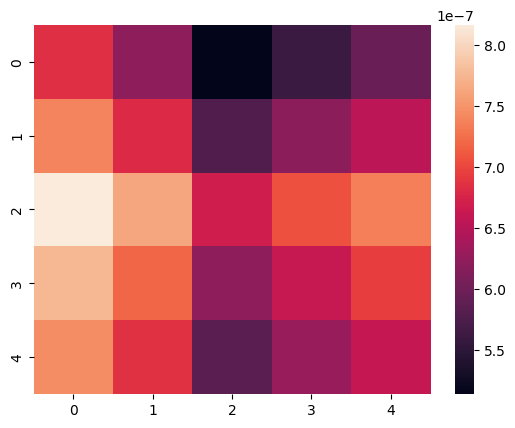

In [151]:
sns.heatmap(slopeH2)

In [12]:
test = np.array([1,2,3,4])

In [ ]:
def find_maxima(x,n):
    """ returns an array with n extreme values of x"""
    
    max_index = signal.argrelmax(x)[0]         # create array with indices of local maxima of x
    
    #ext_index = np.append(max_index)           # array with indices of local extrema in x
    #ext_index = np.sort(ext_index)             # sort array (alternating minima and maxima)
    extrema = x[max_index]                     # array with the actual values of the extrema
       
    if len(extrema) == 0:                      # if all values in x are the same and no extremum is found:
        extrema = np.append(extrema,x[-1])     #   return last value of x in this case
    while len(extrema) < n:                    # if less than n extrema have been found:
        extrema = np.append(extrema,extrema[0])#   repeat last extremum until array has n elements
    while len(extrema) > n:                    # if more than n extrema have been found:
        extrema = np.delete(extrema,-1)        #   delete elements until arrays has n elements
        
    return extrema

To assess the last ten maxima of the time series, just set maxima to be found excessvely high and remove duplicates from array (bc `np.append(extrema,extema[0])`) after appending all maxima. Then calculate the slope through the last 10 elements of the extrema array. This should result in a similar pattern as the one found for the early maxima slopes of H2. 

### Contour plots

Text(0.5, 1.0, 'Growth rate of $H_2$ \n $d_{H_{max}} = $10-3, H2 invader')

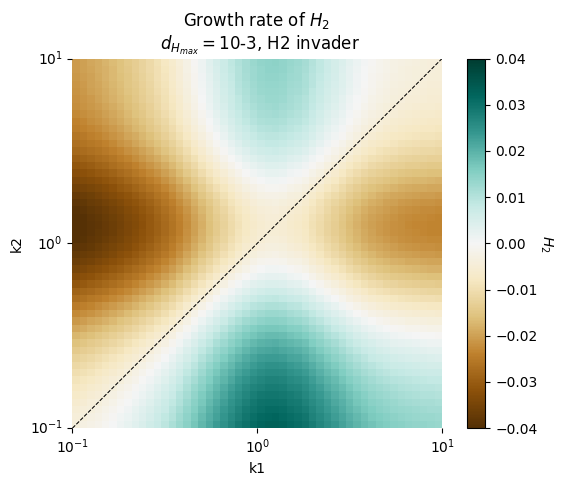

In [19]:
slopeH1 = np.loadtxt("./data/growthrateV3_10-3/H1Slope10-3_log2.csv", delimiter=",")
slopeH2 = np.loadtxt("./data/growthrateV3_10-3/H2Slope10-3_log2.csv", delimiter=",")
d_Hmax = "10-3"
fig, ax3 = plt.subplots()
k_1_range = np.geomspace(0.1, 10, 50)
ticks = np.append(k_1_range, 10)
ax3 = sns.heatmap(slopeH2, cmap="BrBG", square=True, cbar=False, vmin=-0.04, vmax=0.04)
cbar3 = ax3.figure.colorbar(ax3.collections[0])
cbar3.set_label('$H_2$', rotation=270, labelpad=12)
ax3.set_xticks(np.linspace(0, len(k_1_range), 3))
ax3.set_yticks(np.linspace(0, len(k_1_range), 3))
ax3.invert_yaxis()
ax3.set_xticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"), rotation=0)
ax3.set_yticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"))
# draw diagonal dotted
ax3.plot([0, len(k_1_range)], [0, len(k_1_range)], color="black", linestyle="--", linewidth=0.75)
plt.xlabel('$k_1$')
plt.ylabel('$k_2$')
ax3.set_xlabel("k1")
ax3.set_ylabel("k2")
plt.title('Growth rate of $H_2$ \n $d_{H_{max}} = $' + str(d_Hmax) + ', H2 invader')

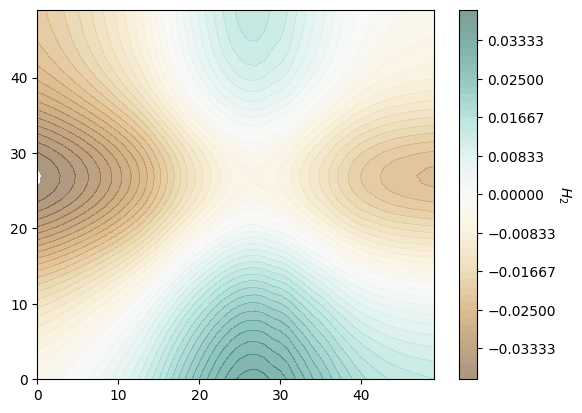

In [36]:
fig, ax = plt.subplots()
ax = plt.contourf(slopeH2, cmap="BrBG", levels=np.linspace(-0.04, 0.04, 49), alpha=0.5)
cbar = fig.colorbar(ax)
cbar.set_label('$H_2$', rotation=270, labelpad=12)

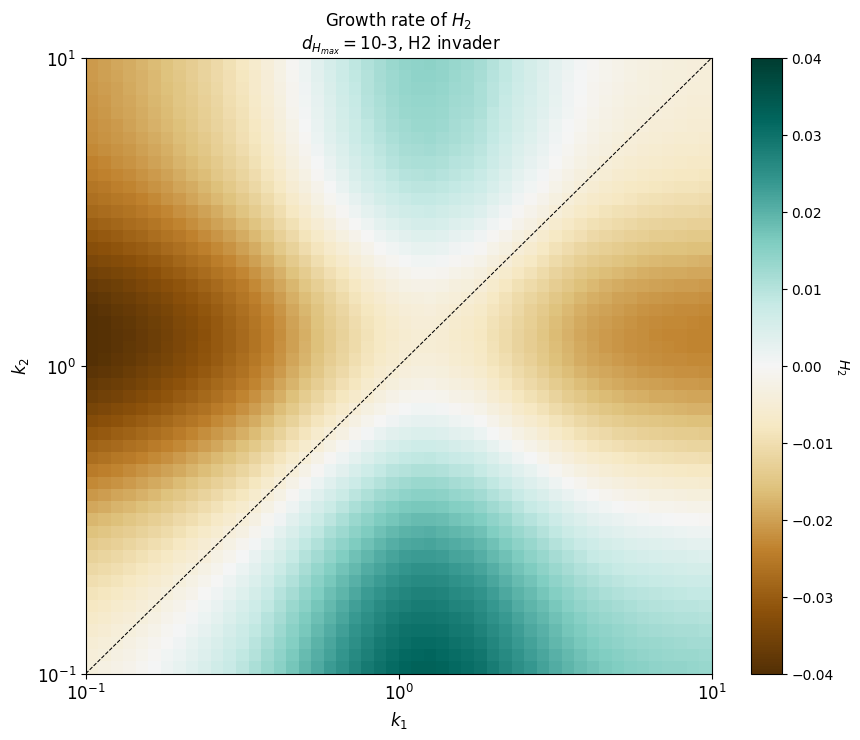

In [14]:
slopeH1 = np.loadtxt("./data/growthrateV3_10-3/H1Slope10-3_log2.csv", delimiter=",")
slopeH2 = np.loadtxt("./data/growthrateV3_10-3/H2Slope10-3_log2.csv", delimiter=",")
d_Hmax = "10-3"
fig, ax3 = plt.subplots(figsize=(10.1,8))
ax3.pcolormesh((slopeH2), cmap="BrBG", vmin=-0.04, vmax=0.04)#, vmin=-1*10**-6, vmax=1*10**-6)
cbar3 = ax3.figure.colorbar(ax3.collections[0])
cbar3.set_label('$H_2$', rotation=270, labelpad=12)
ax3.set_xticks(np.linspace(0, len(k_1_range), 3))
ax3.set_yticks(np.linspace(0, len(k_1_range), 3))
ax3.set_xticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"), rotation=0)
ax3.set_yticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"))
ax3.set_title('Growth rate of $H_2$ \n $d_{H_{max}} = $' + str(d_Hmax) + ', H2 invader')

# add diagonal dotted
ax3.plot([0, len(k_1_range)], [0, len(k_1_range)], color="black", linestyle="--", linewidth=0.75)
plt.savefig('./output/turingtalk230926/invasiongrowthrate_'+str(d_Hmax)+'_obsi.png')
ax3.set_xlabel("$k_1$", fontsize=12)
ax3.set_ylabel("$k_2$", fontsize=12)
ax3.tick_params(labelsize=12)
plt.show()

C:\Users\UGEW Support\AppData\Local\Temp\ipykernel_11856\778626030.py:5: RuntimeWarning: invalid value encountered in log
  ax3.pcolormesh(np.log(slopeH2), cmap="BrBG")#, vmin=-1*10**-6, vmax=10**-6)


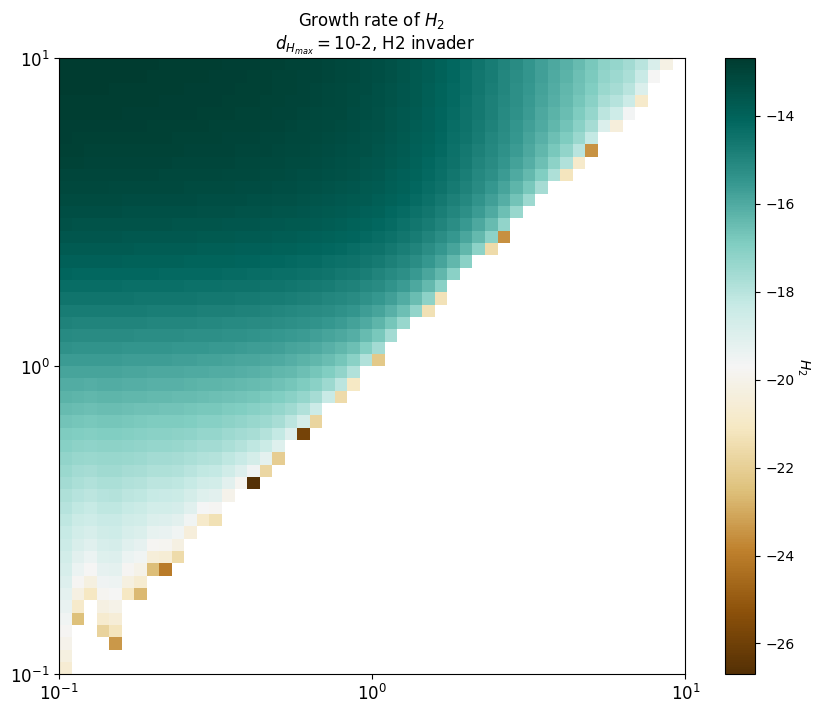

In [52]:
slopeH1 = np.loadtxt("./data/growthrateV3_10-2/H1Slope10-2.csv", delimiter=",")
slopeH2 = np.loadtxt("./data/growthrateV3_10-2/H2Slope10-2.csv", delimiter=",")
d_Hmax = "10-2"
fig, ax3 = plt.subplots(figsize=(10.1,8))
ax3.pcolormesh(np.log(slopeH2), cmap="BrBG")#, vmin=-1*10**-6, vmax=10**-6)
cbar3 = ax3.figure.colorbar(ax3.collections[0])
cbar3.set_label('$H_2$', rotation=270, labelpad=12)
ax3.set_xticks(np.linspace(0, len(k_1_range), 3))
ax3.set_yticks(np.linspace(0, len(k_1_range), 3))
ax3.set_xticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"), rotation=0)
ax3.set_yticklabels(("$10^{-1}$", "$10^{0}$", "$10^{1}$"))
ax3.set_title('Growth rate of $H_2$ \n $d_{H_{max}} = $' + str(d_Hmax) + ', H2 invader')
ax3.tick_params(labelsize=12)
plt.savefig('./output/turingtalk230926/invasiongrowthrate_'+str(d_Hmax)+'_H2.png')
plt.show()